## 1. Data Understanding and Preprocessing

In [58]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import norm,t

import mord
from mord import LogisticAT

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.stats import proportion

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import matplotlib

from matplotlib import pyplot as plt
import pylab
from pylab import plot,show,legend, title,xlabel,ylabel

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [76]:
df=pd.read_csv(r"C:\Users\Vaishnavi\Downloads\data.csv")

In [60]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [77]:
df.columns = df.columns.str.replace(' ','_')

In [78]:
df = df.rename(columns={'Bankrupt?':'Bankrupt'})

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt                                                  6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [64]:
print(df.describe())

          Bankrupt  _ROA(C)_before_interest_and_depreciation_before_interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

       _ROA(A)_before_interest_and_%_after_tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                          

In [65]:
print(df.isnull().sum())

Bankrupt                                                    0
_ROA(C)_before_interest_and_depreciation_before_interest    0
_ROA(A)_before_interest_and_%_after_tax                     0
_ROA(B)_before_interest_and_depreciation_after_tax          0
_Operating_Gross_Margin                                     0
                                                           ..
_Liability_to_Equity                                        0
_Degree_of_Financial_Leverage_(DFL)                         0
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0
_Net_Income_Flag                                            0
_Equity_to_Liability                                        0
Length: 96, dtype: int64


In [66]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool


In [67]:
# The classes are heavily skewed we need to solve this issue later.

print(df['Bankrupt'].value_counts())
print('-'* 30)
print('Financially stable: ', round(df['Bankrupt'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(df['Bankrupt'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Bankrupt
0    6599
1     220
Name: count, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


In [68]:
# for col in column:
#     plt.figure(figsize=(12,6))
#     plt.subplot(1,2,2)
#     sns.boxplot(x=col,data=df)
#     plt.title(f'Boxplot of{col}')

#     plt.tight_layout()
#     plt.show()

In [69]:
df1=df
newdf=df1.drop(['Bankrupt', '_Liability-Assets_Flag', '_Net_Income_Flag'], axis=1, inplace=True)

In [70]:
column=df1.columns

In [71]:
def impute(x):
    Q3=df[x].quantile(0.75)
    Q1=df[x].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1-1.5*(IQR)
    
    ub=Q3+1.5*(IQR)
    idx=np.where(df[x]>ub)
    df[x].iloc[idx]=ub
    idx=np.where(df[x]<lb)
    df[x].iloc[idx]=lb

In [72]:
for col in column:
    impute(col)
    

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_41452\457550728.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[x].iloc[idx]=ub
C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_41452\457550728.py:11: FutureWarning: ChainedAssignmentErr

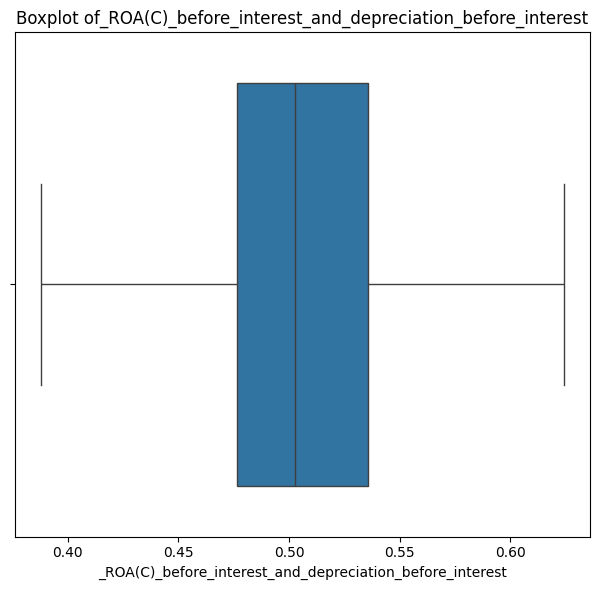

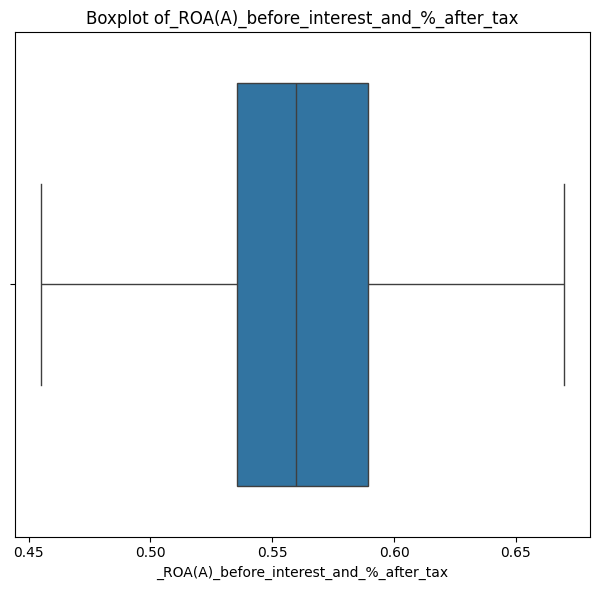

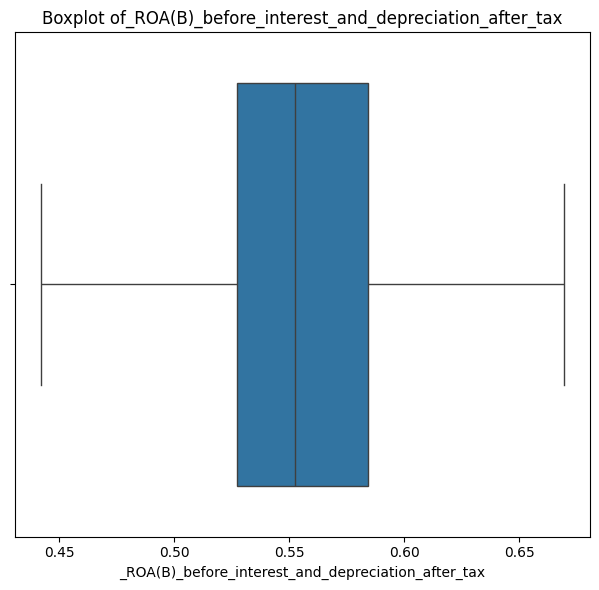

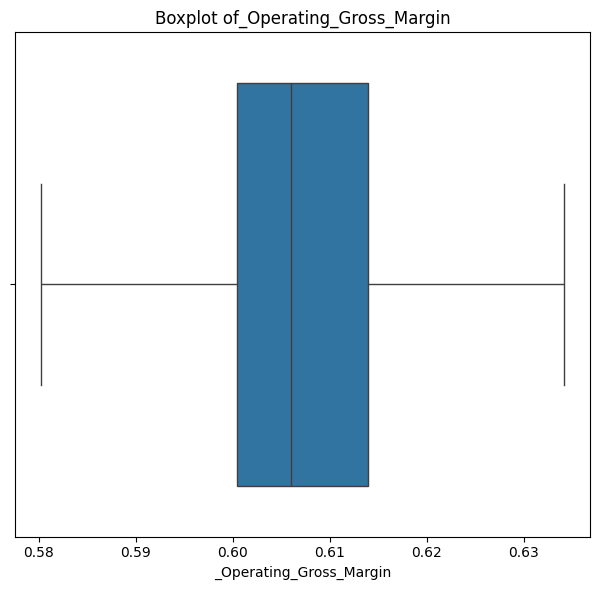

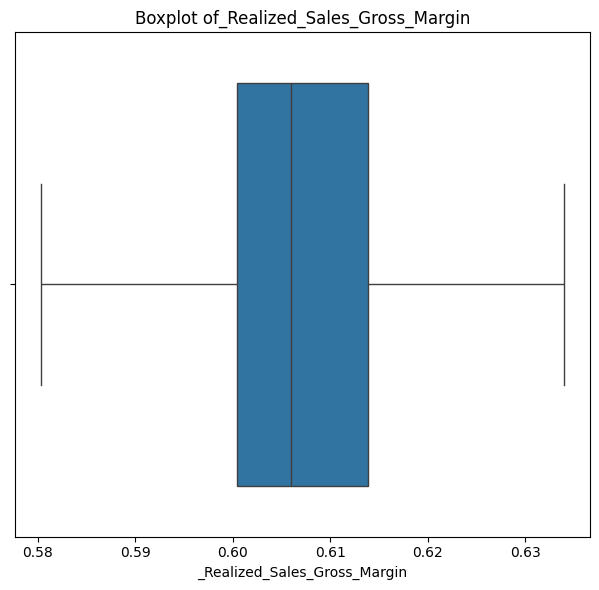

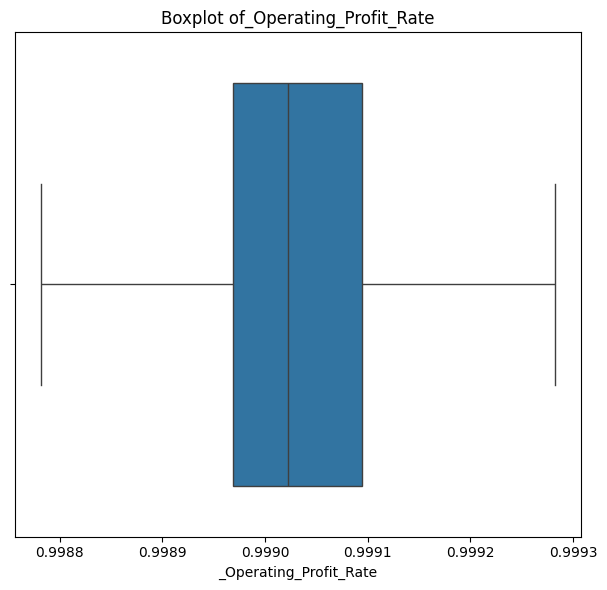

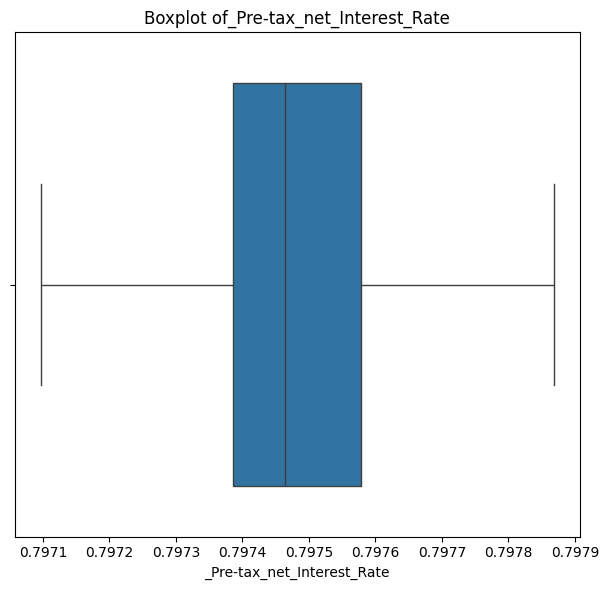

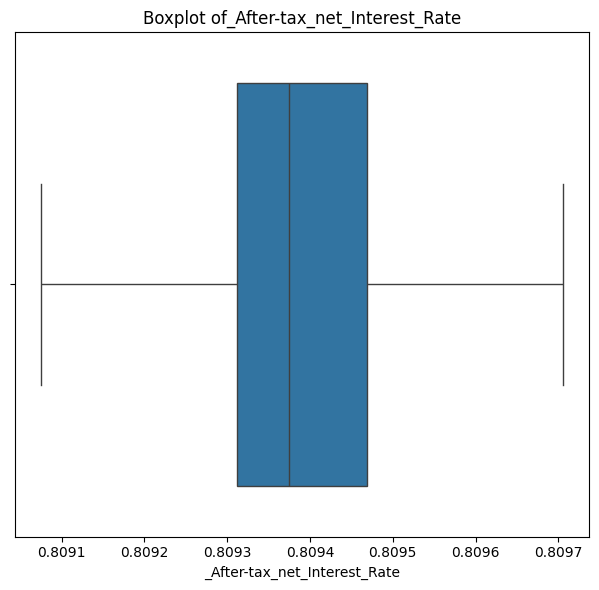

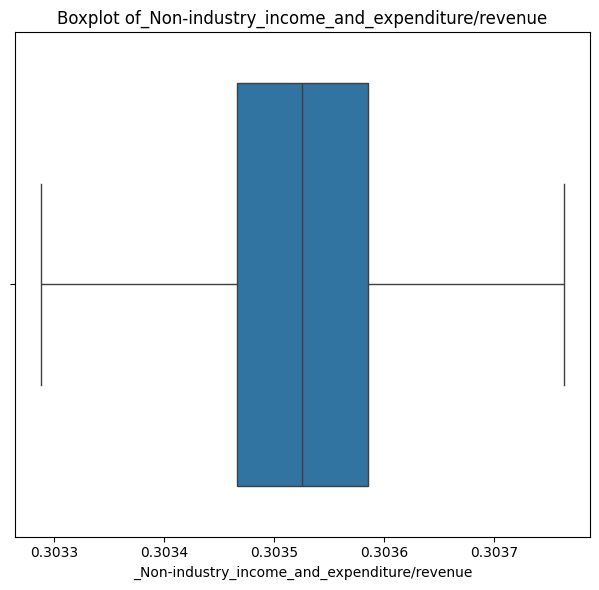

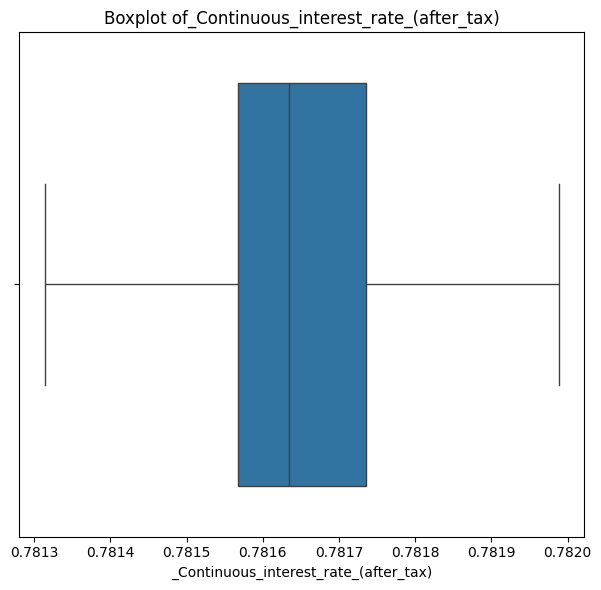

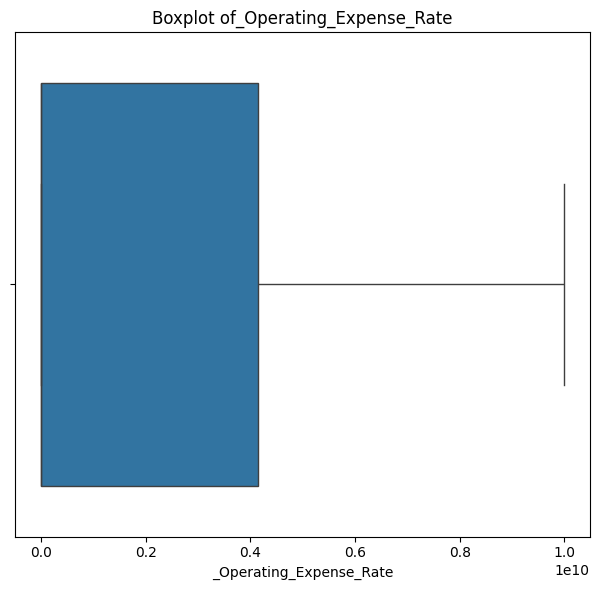

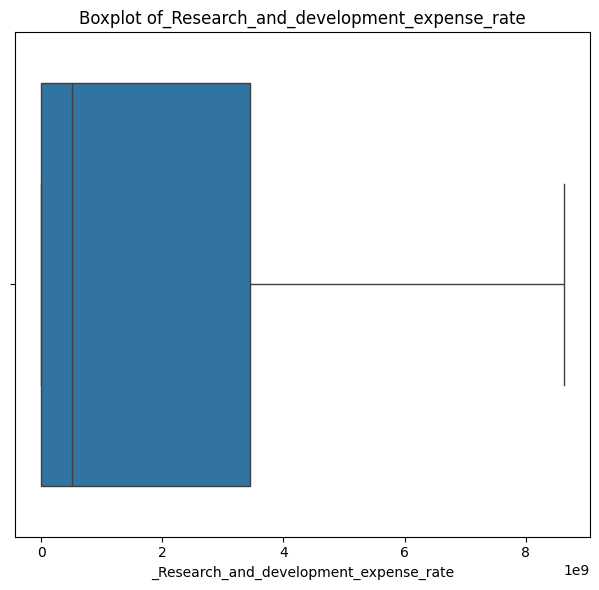

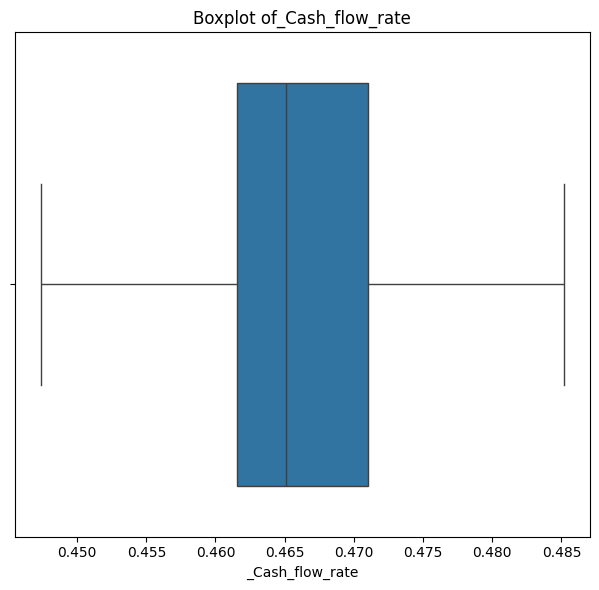

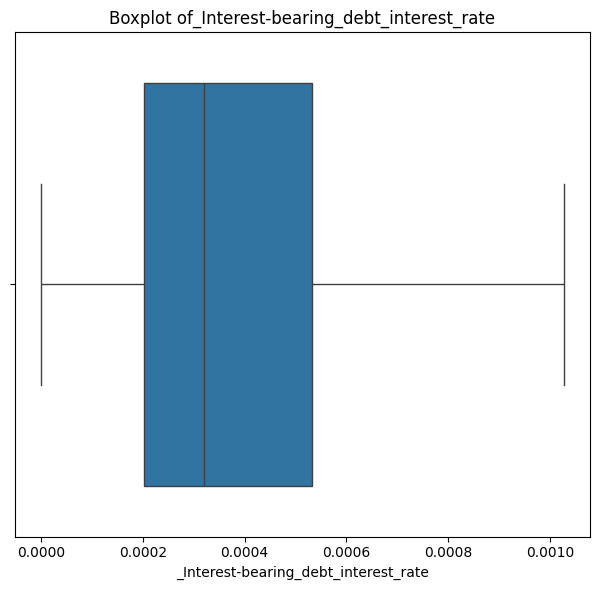

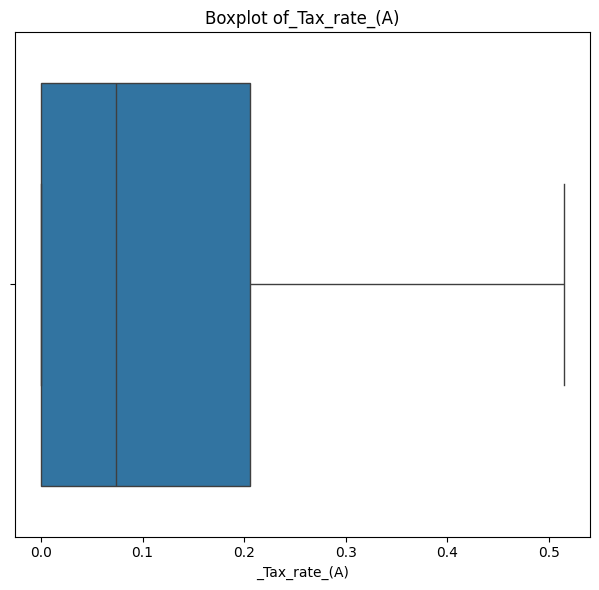

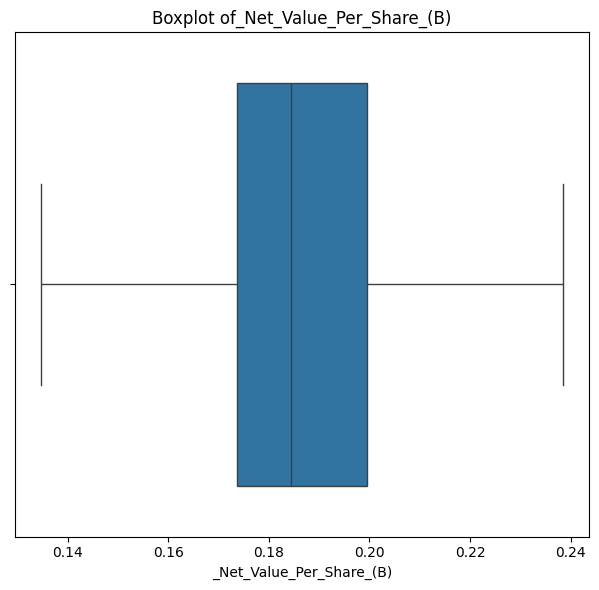

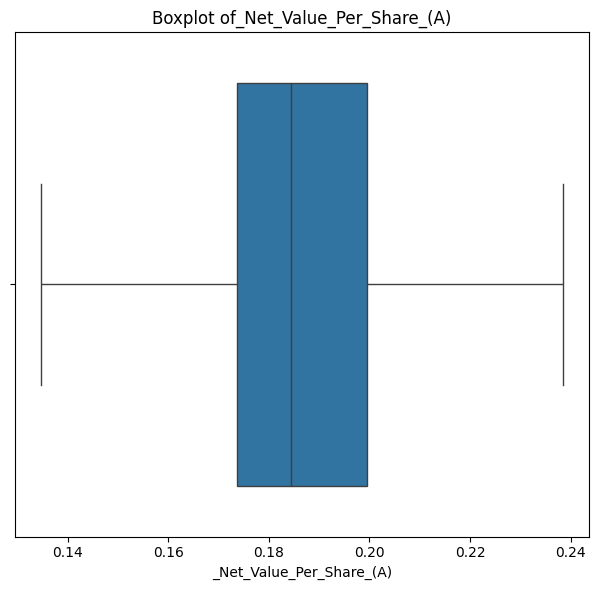

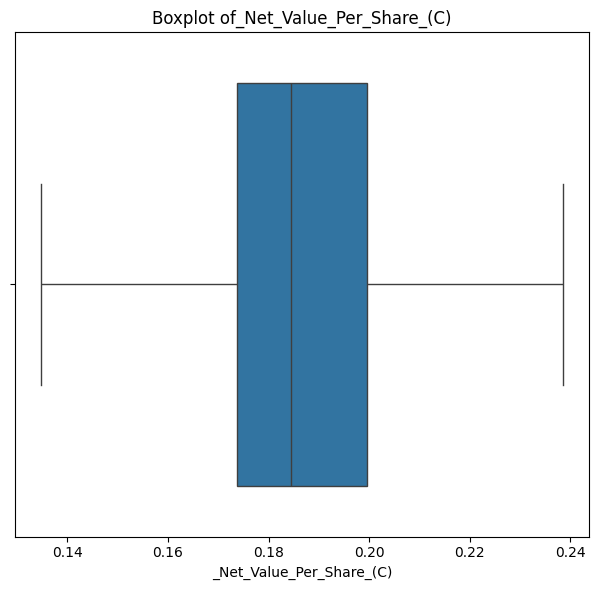

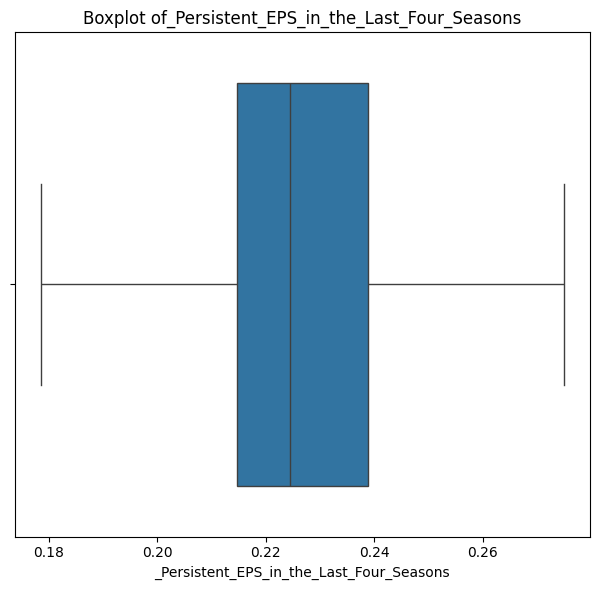

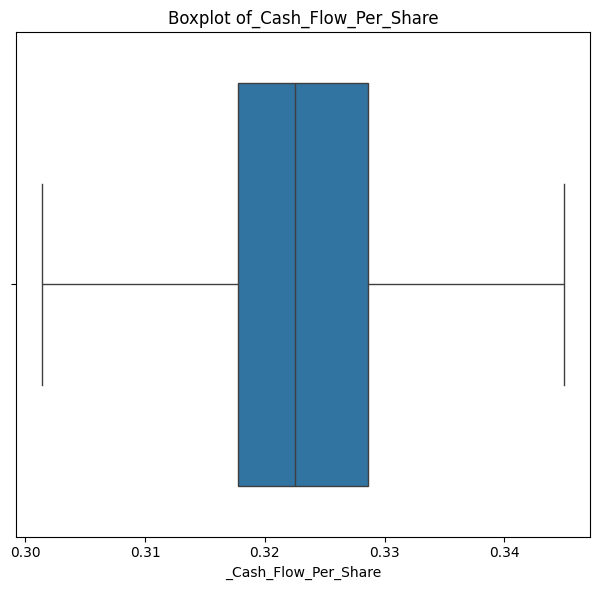

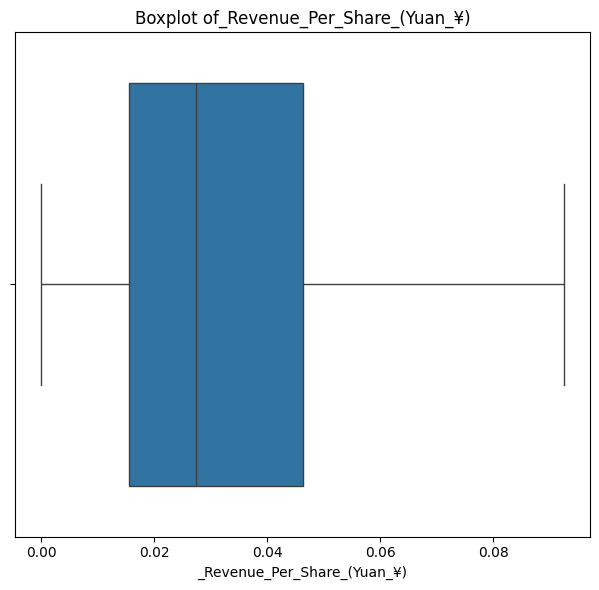

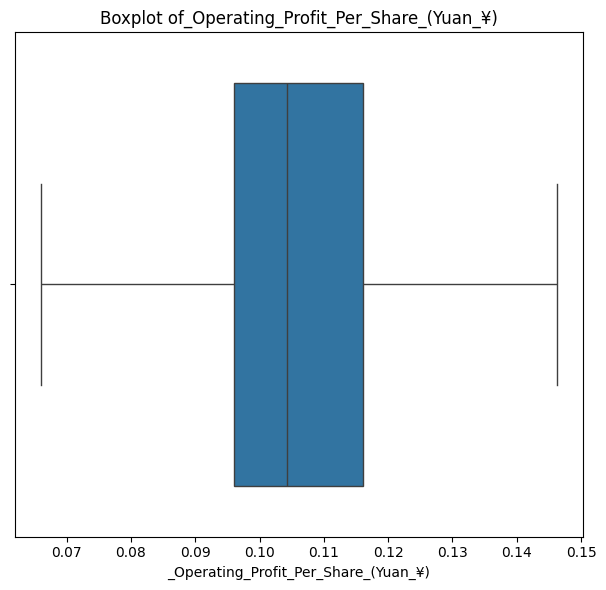

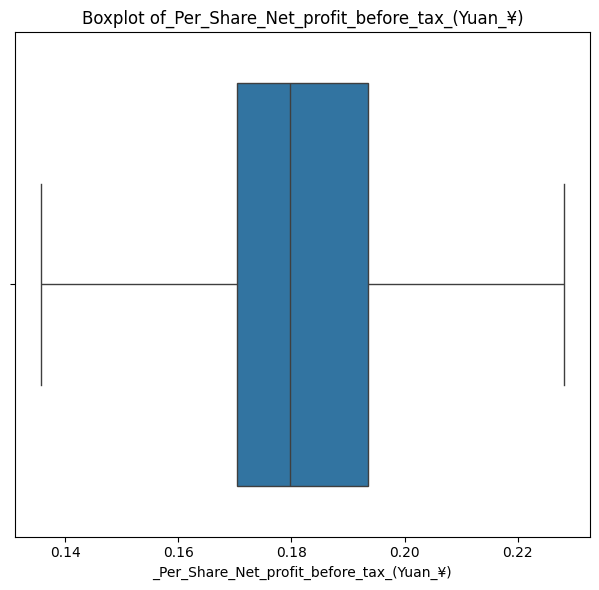

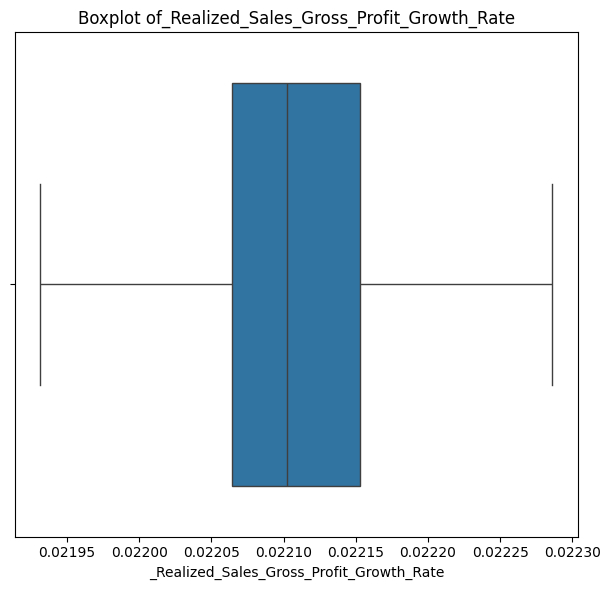

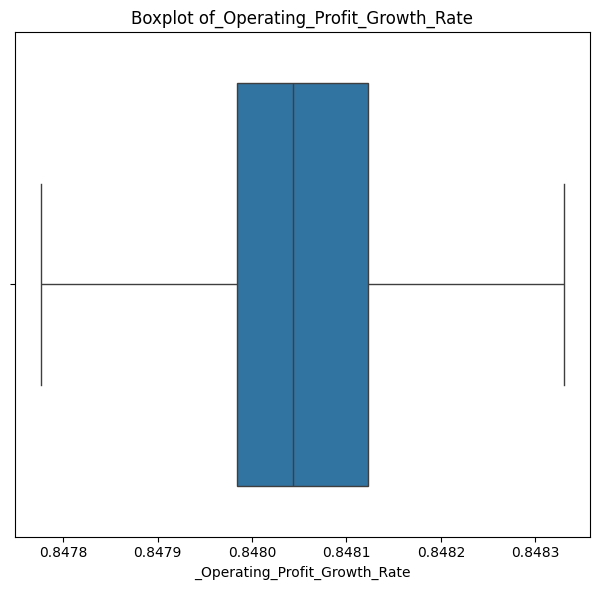

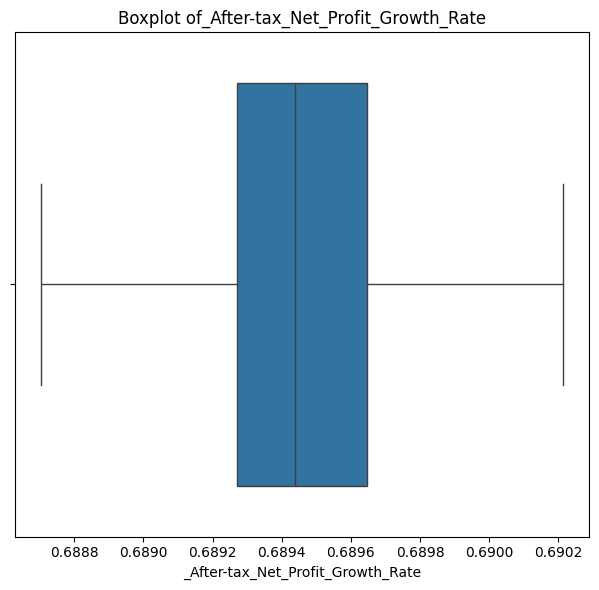

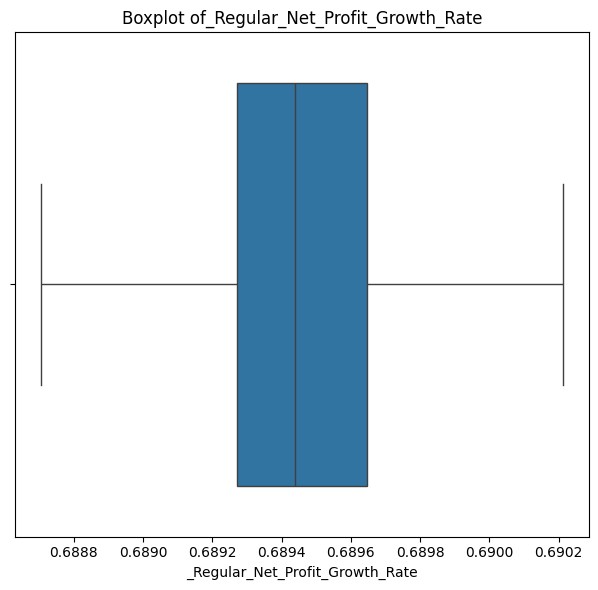

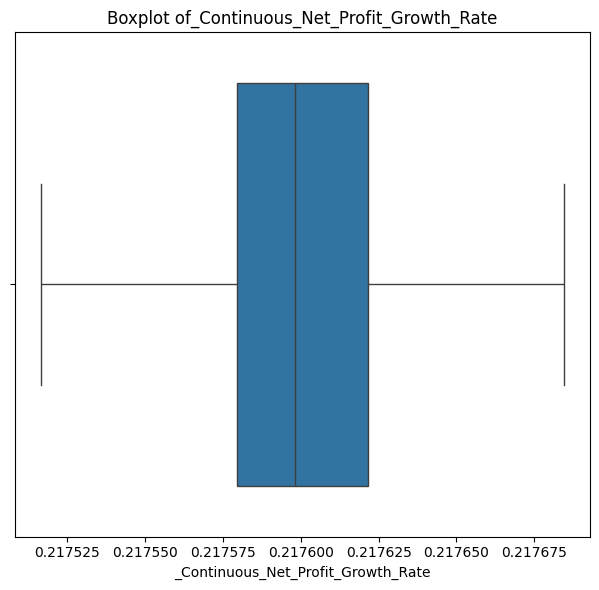

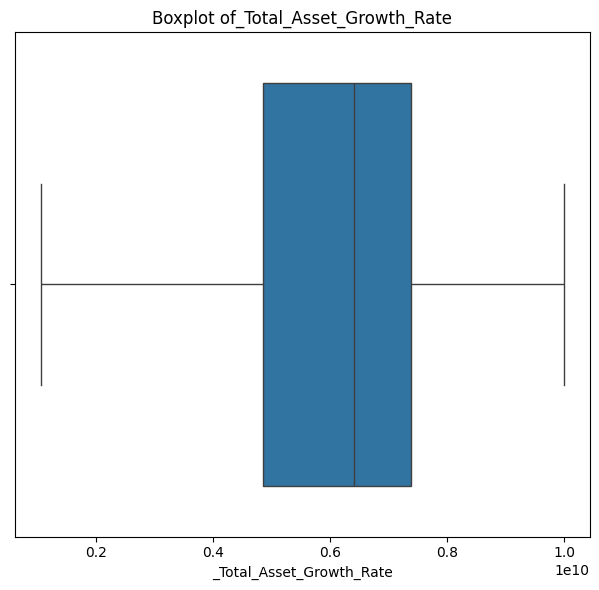

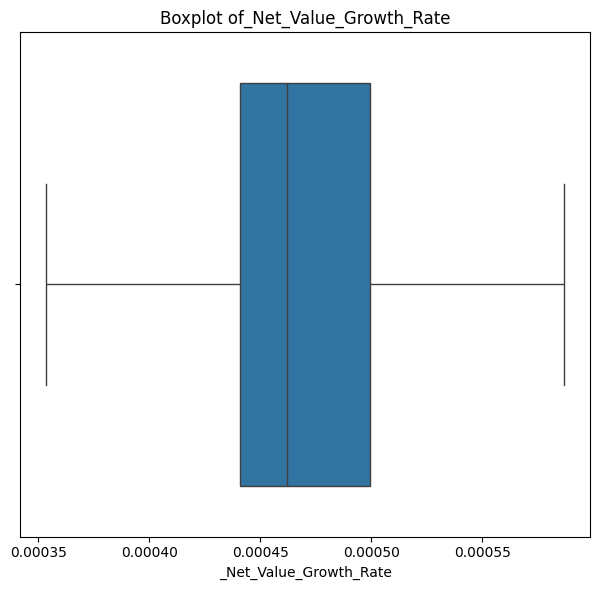

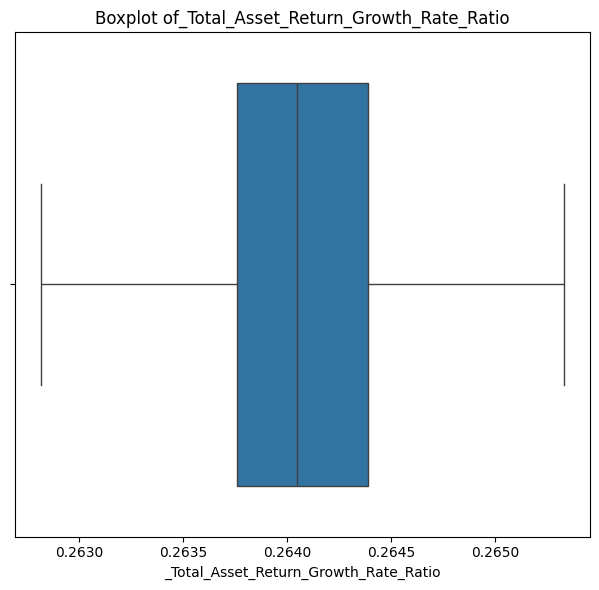

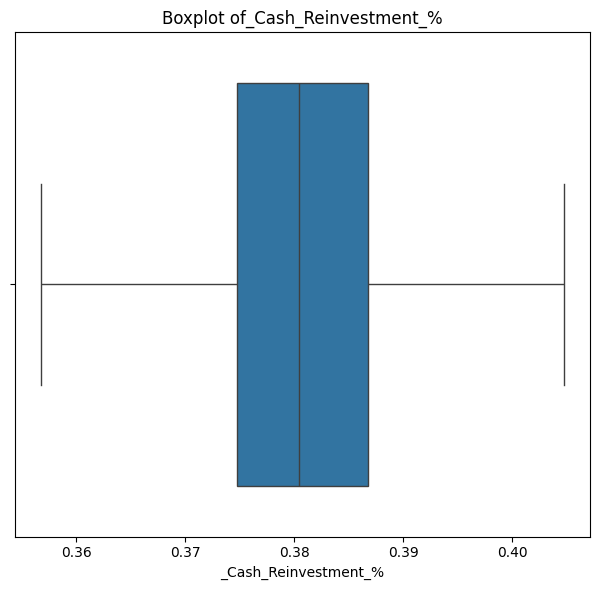

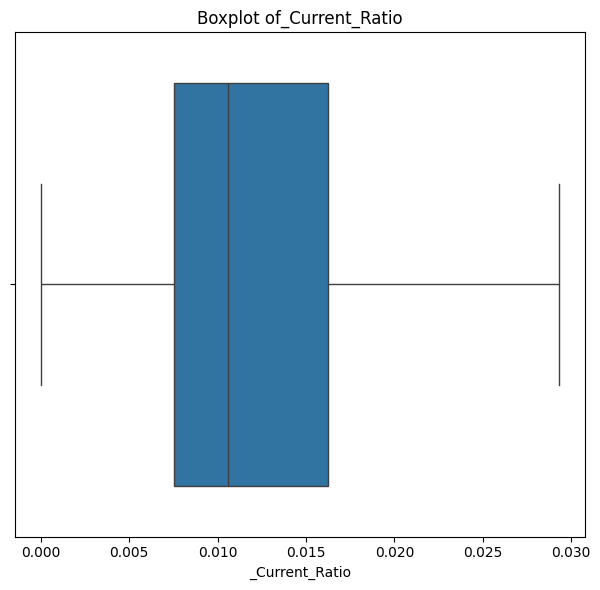

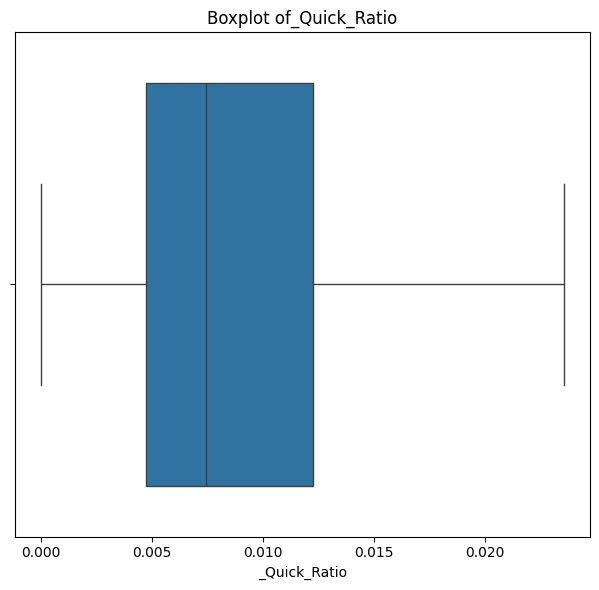

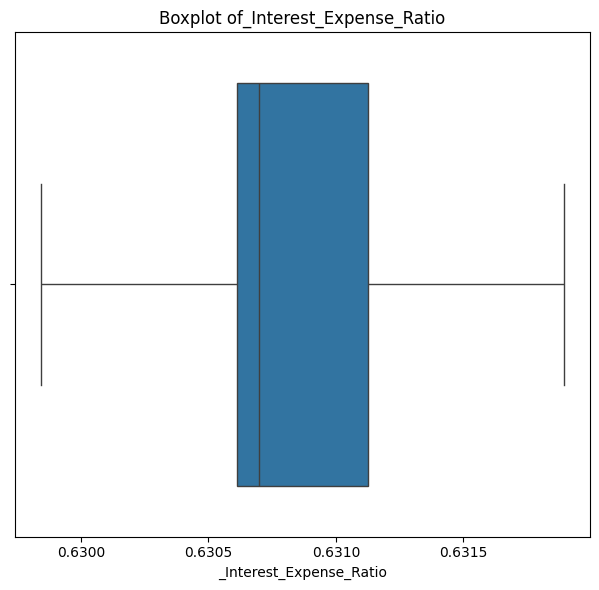

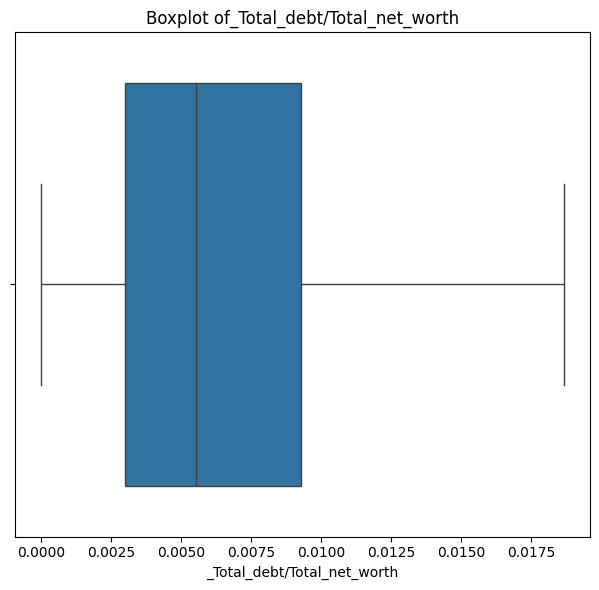

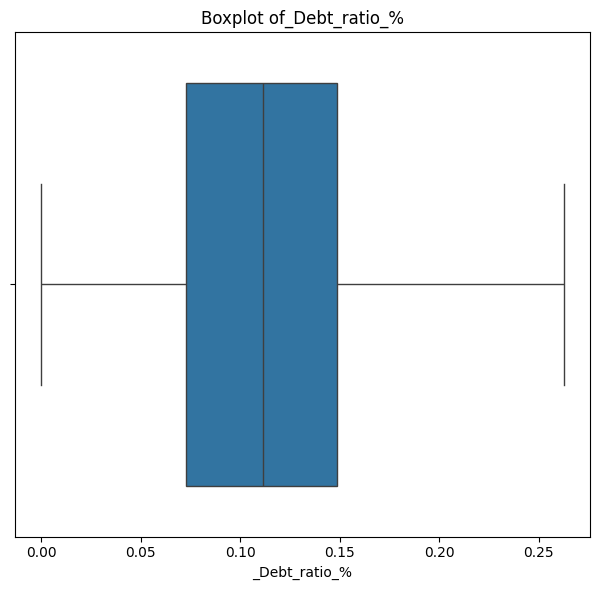

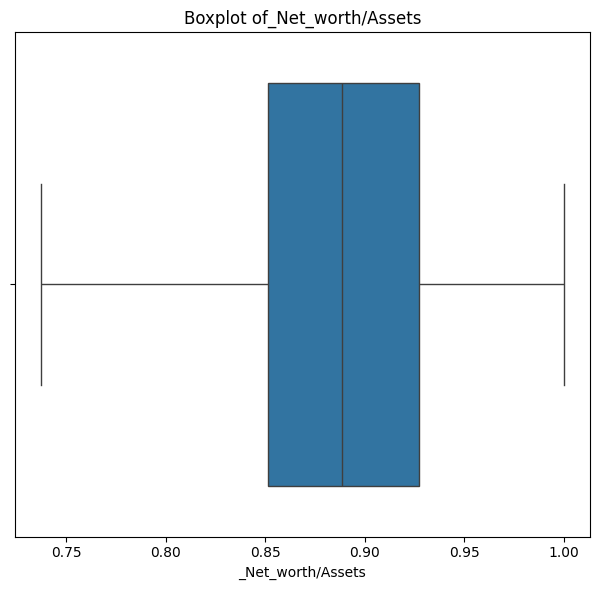

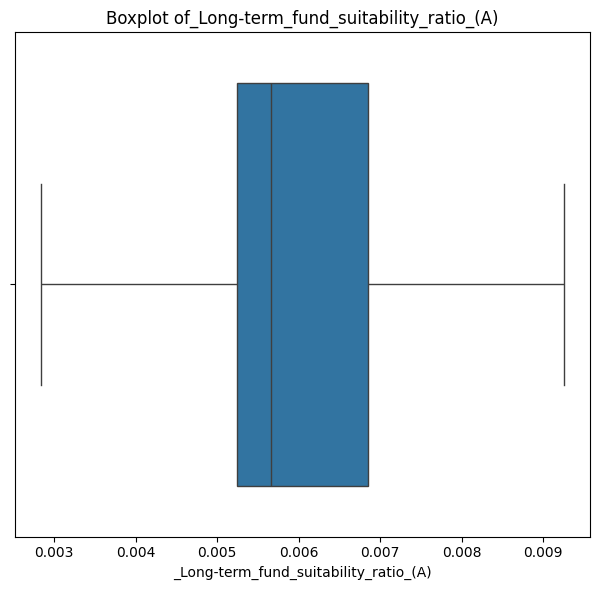

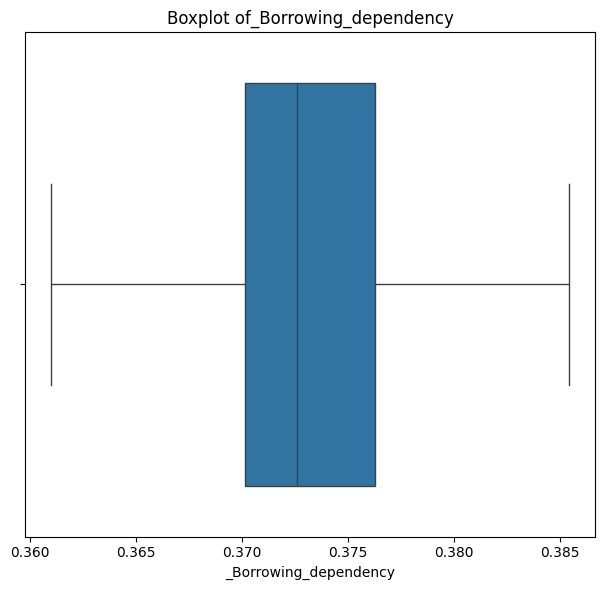

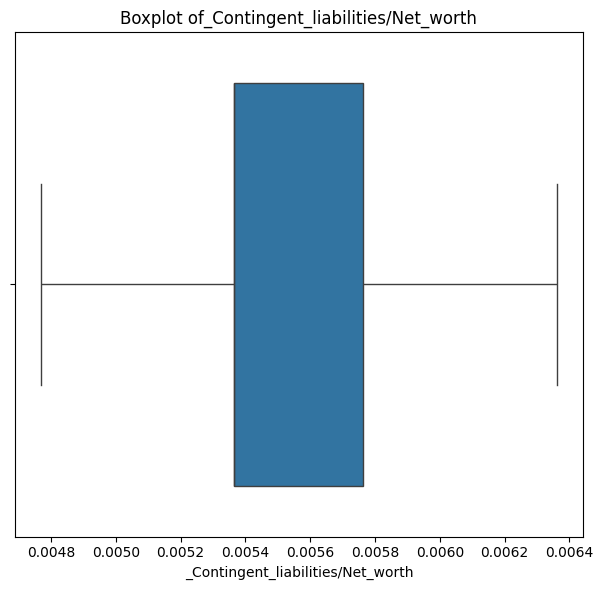

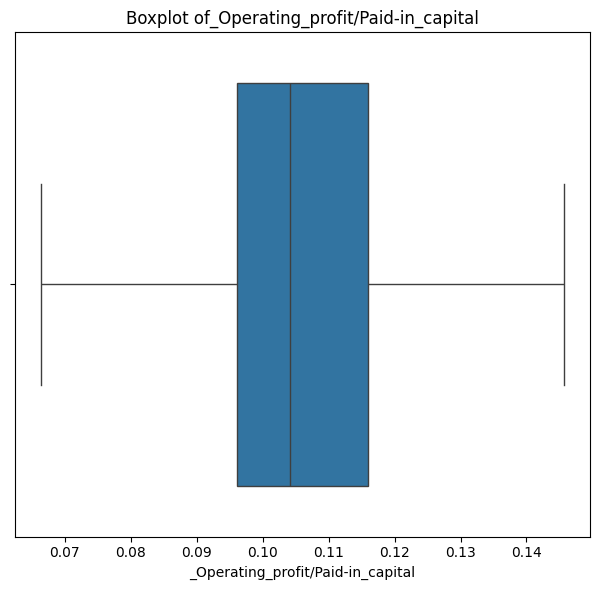

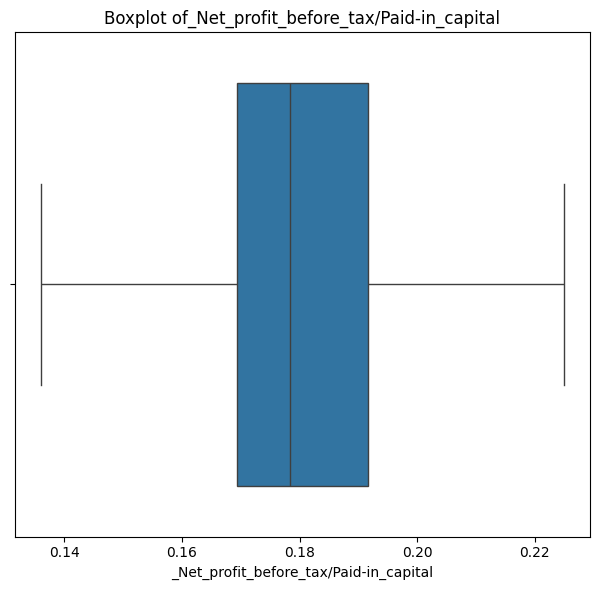

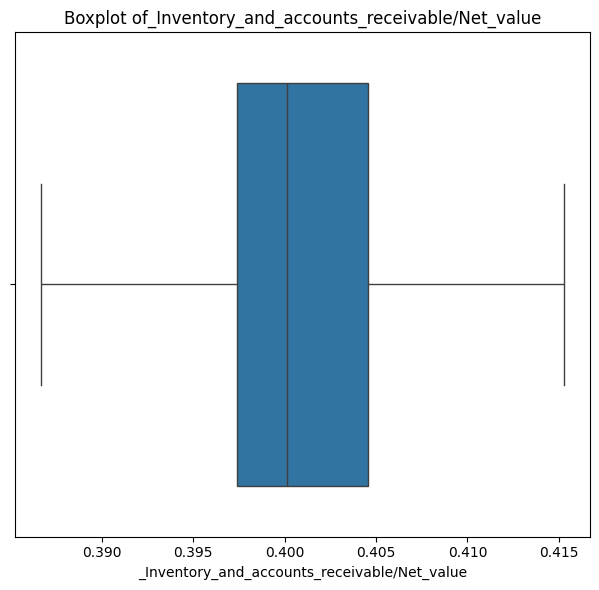

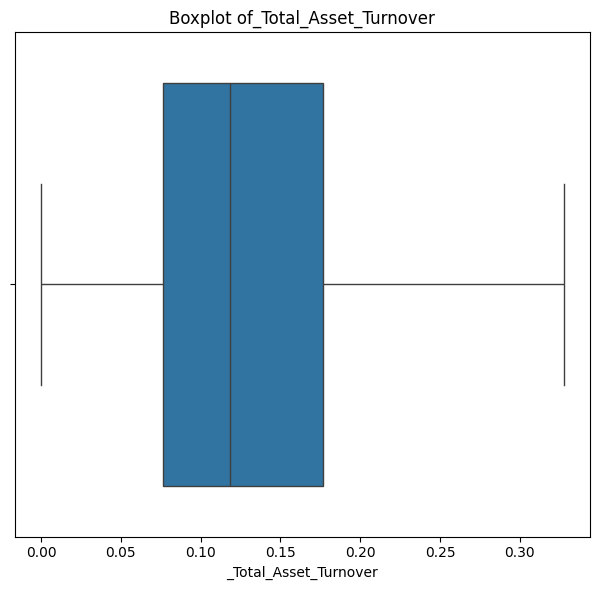

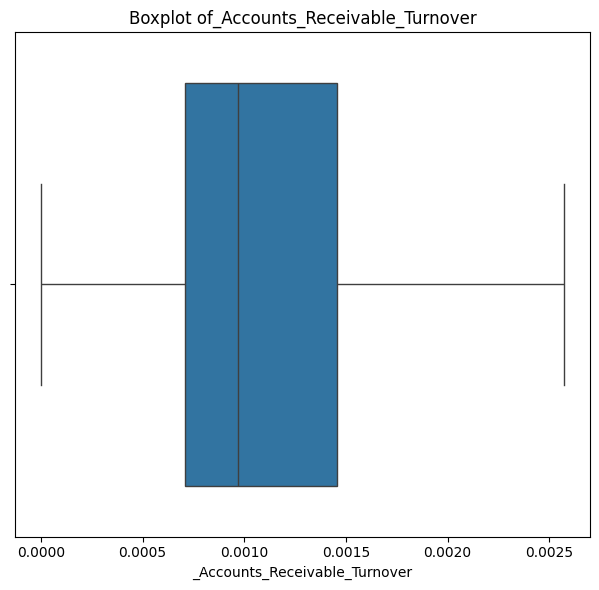

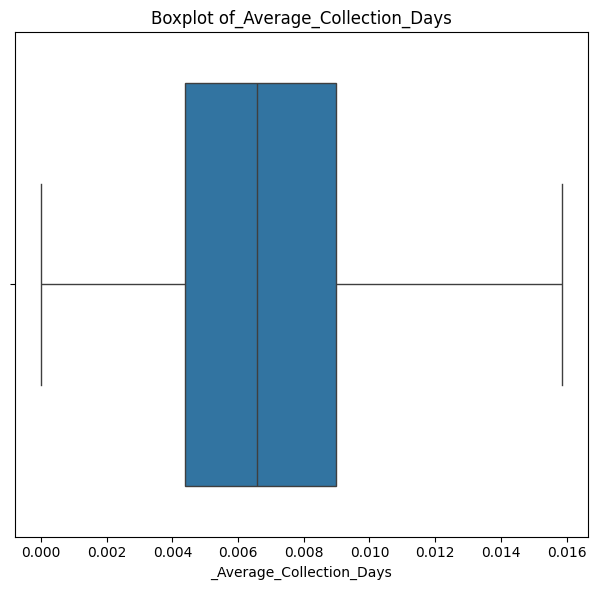

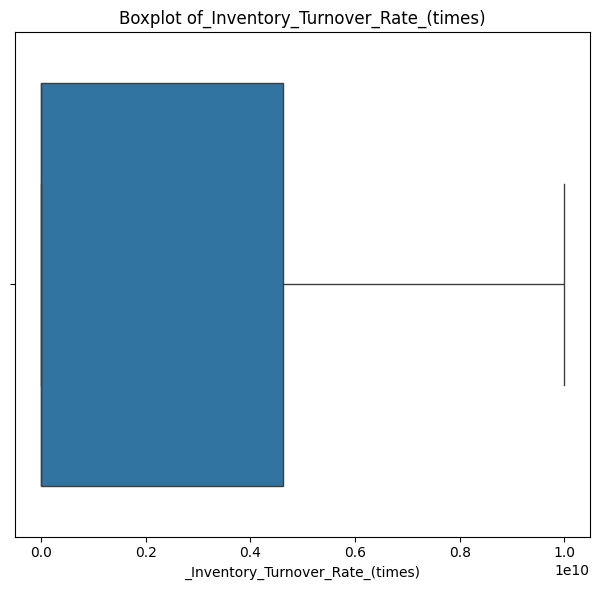

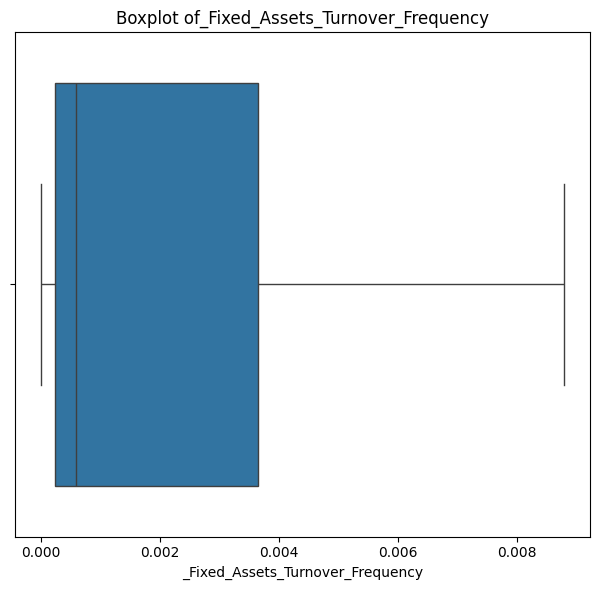

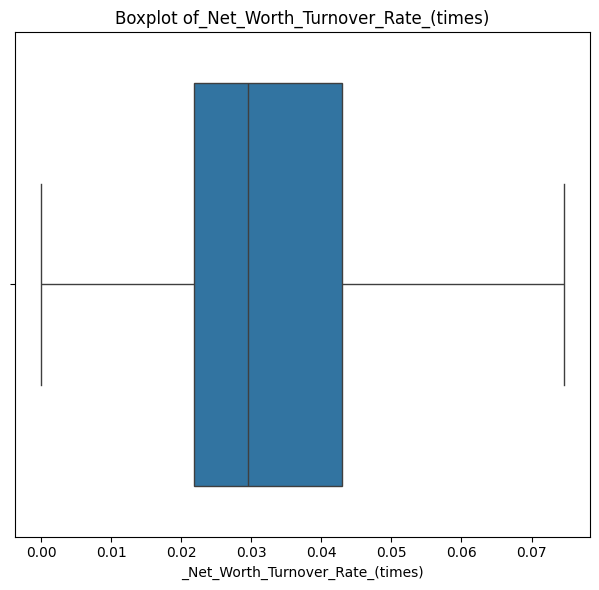

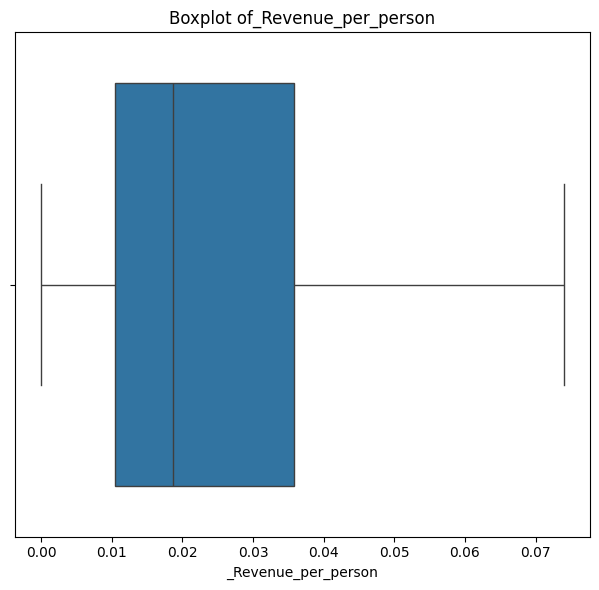

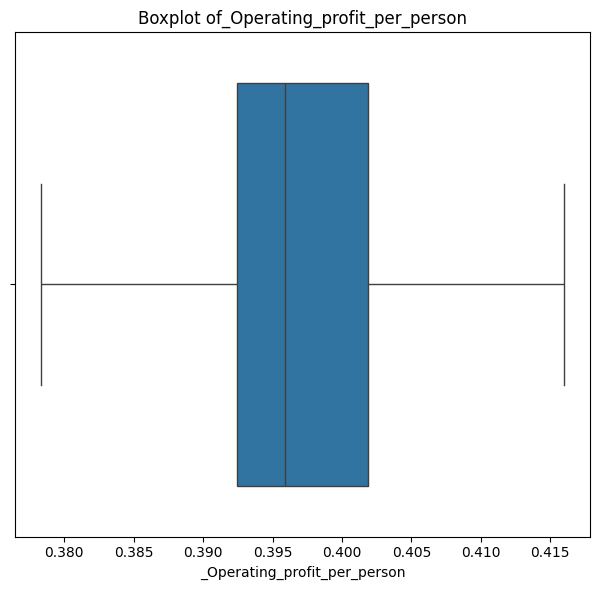

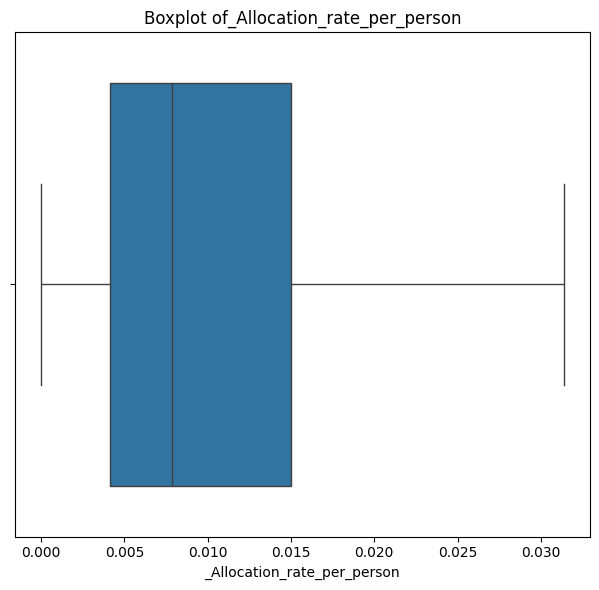

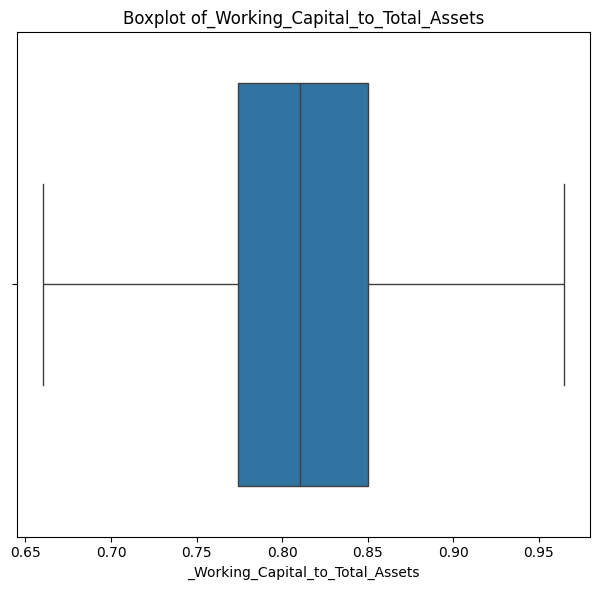

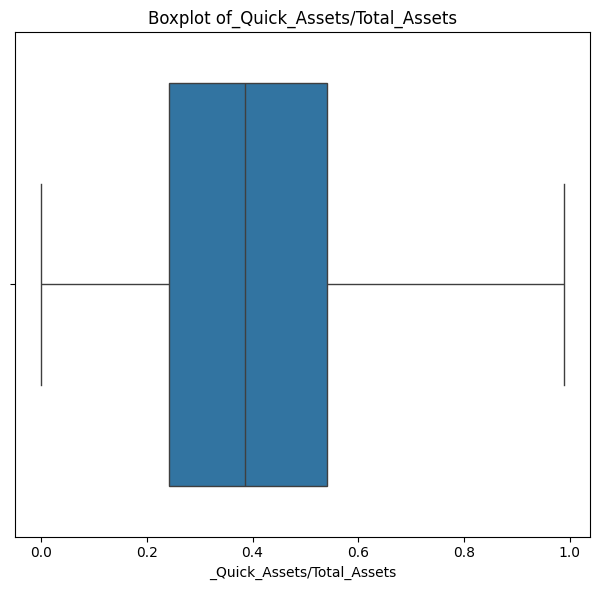

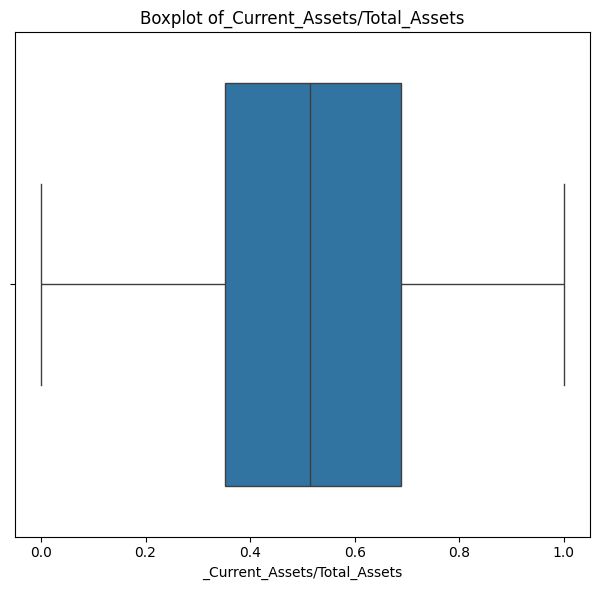

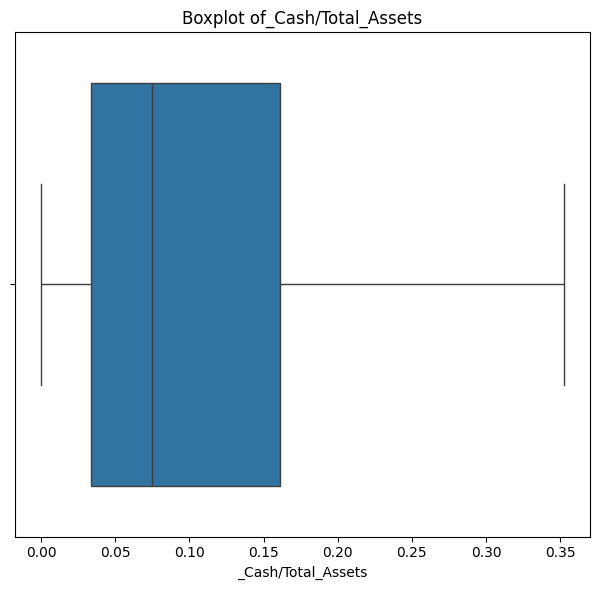

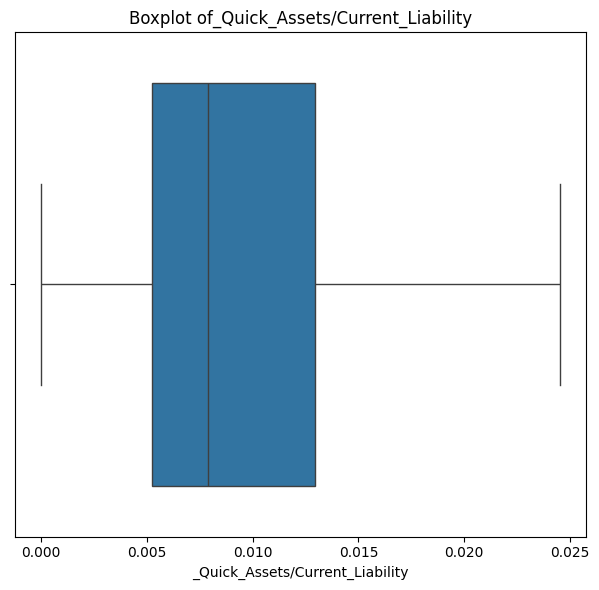

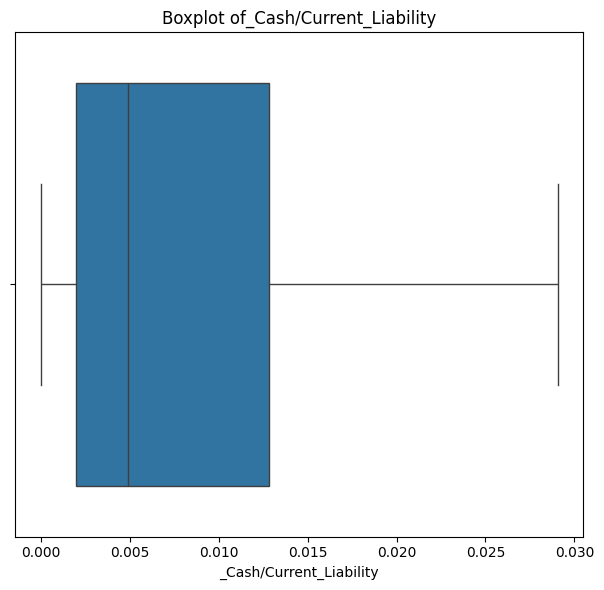

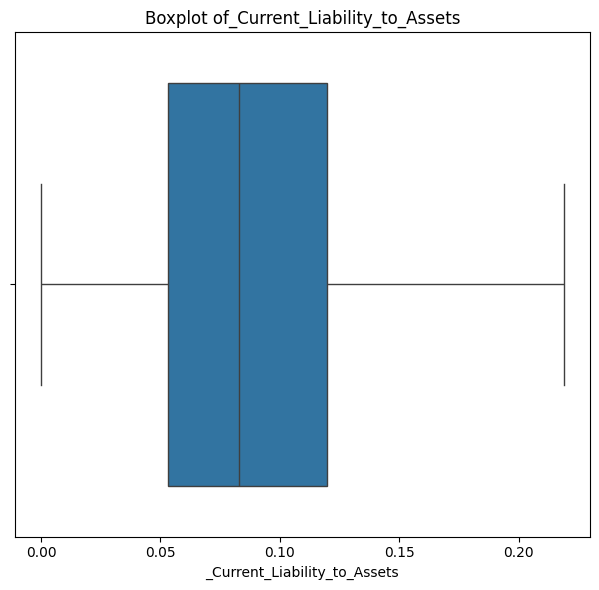

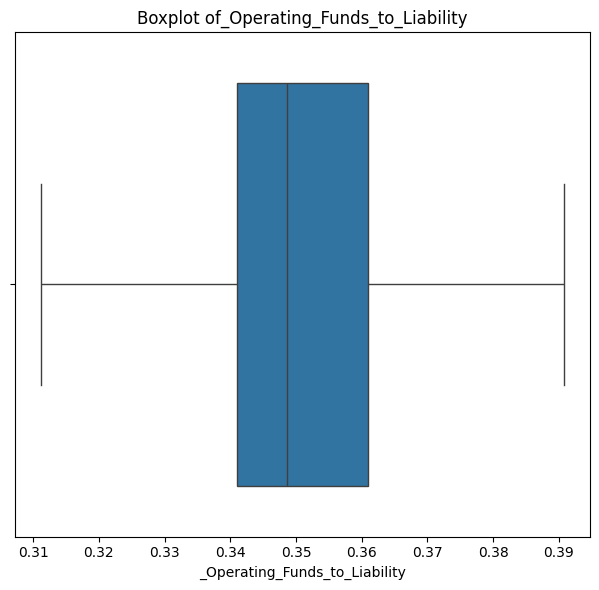

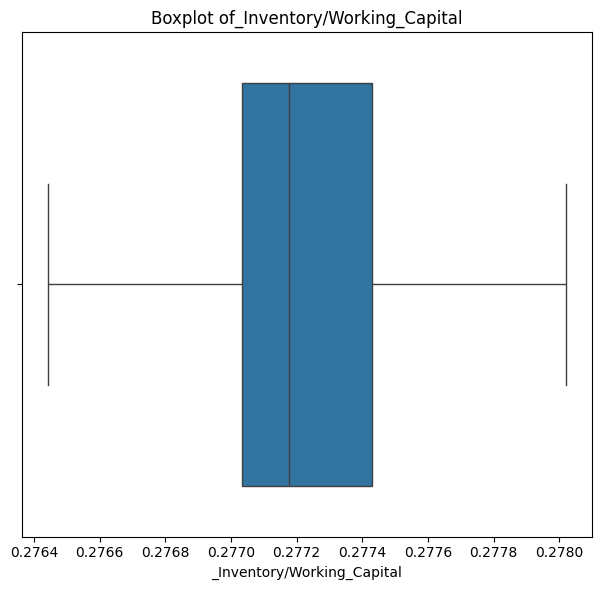

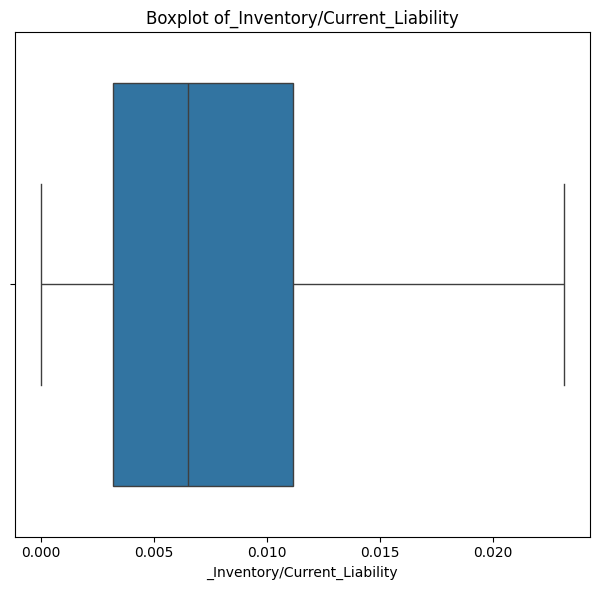

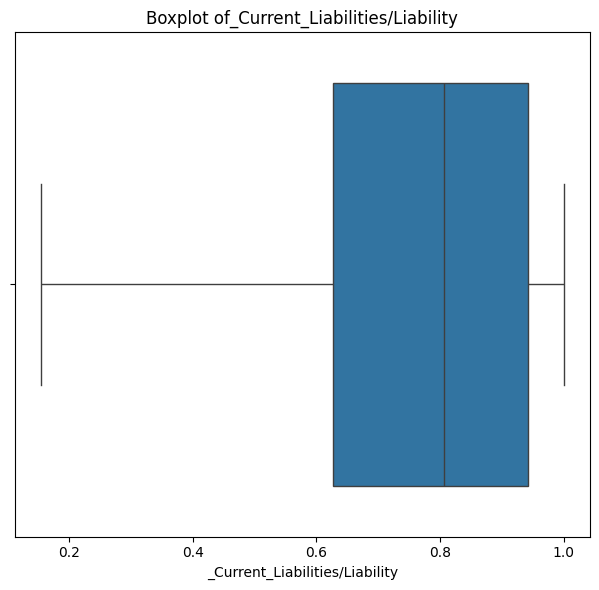

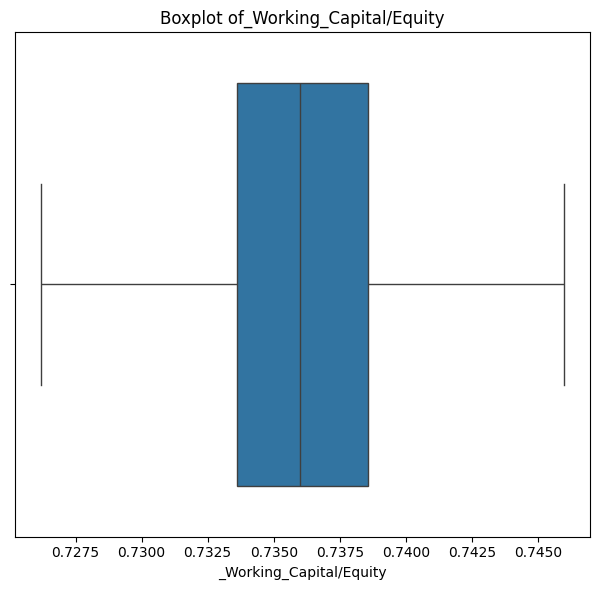

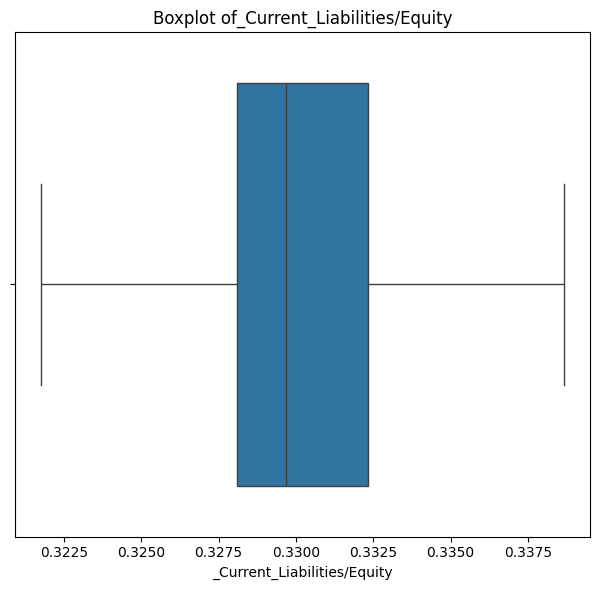

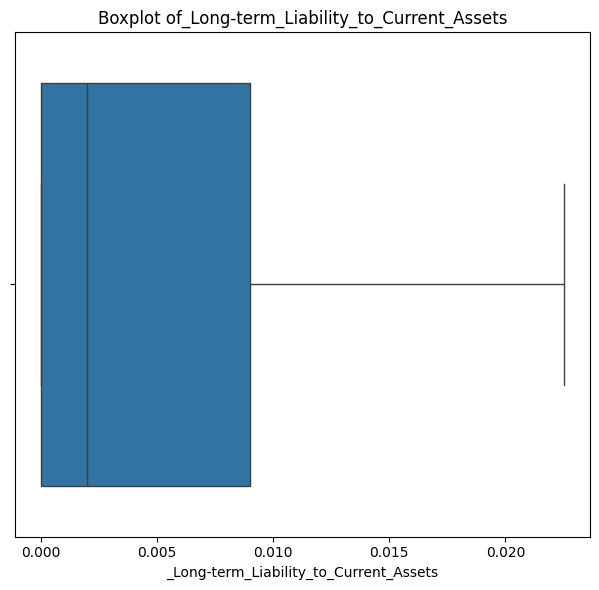

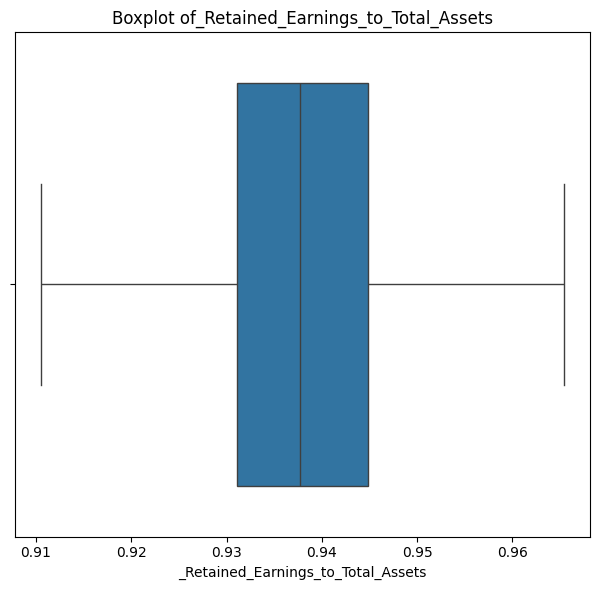

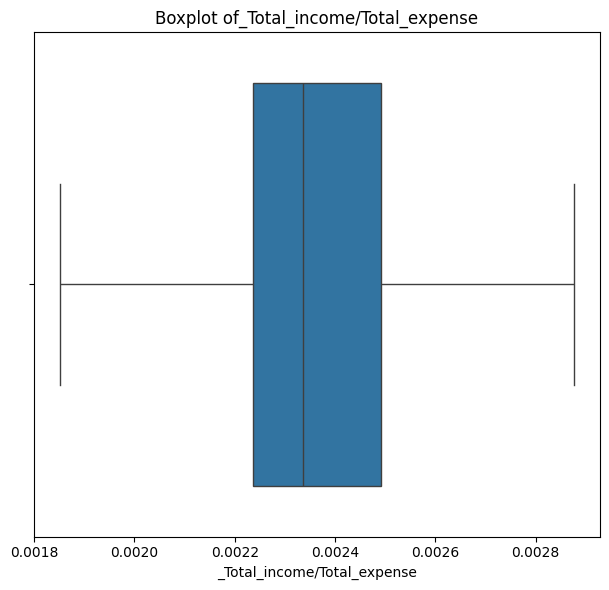

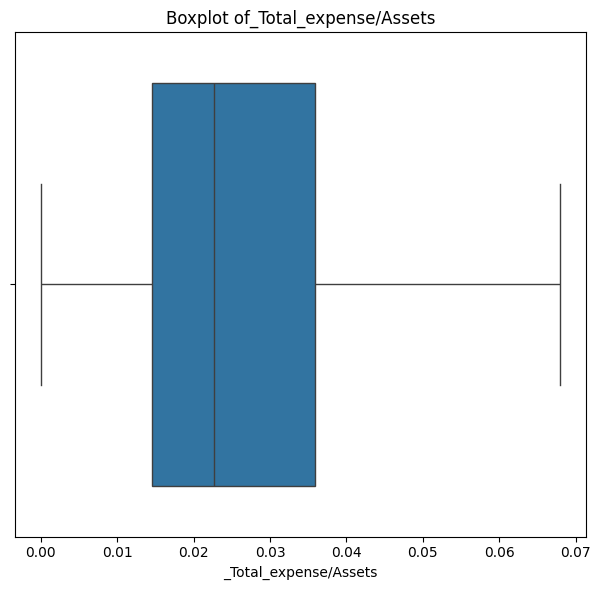

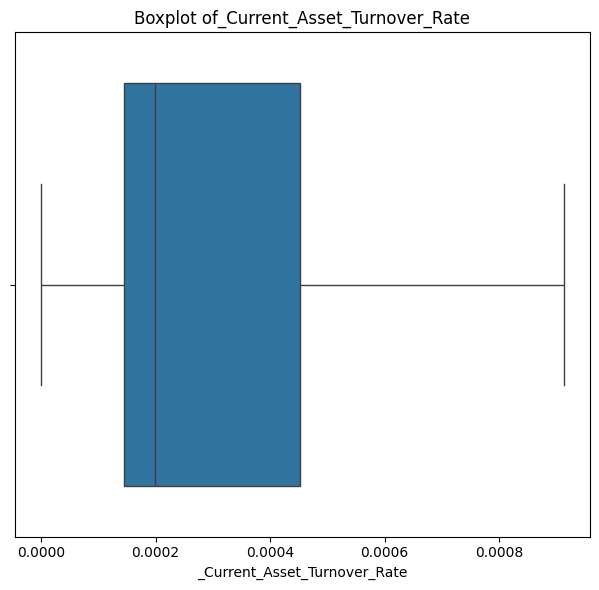

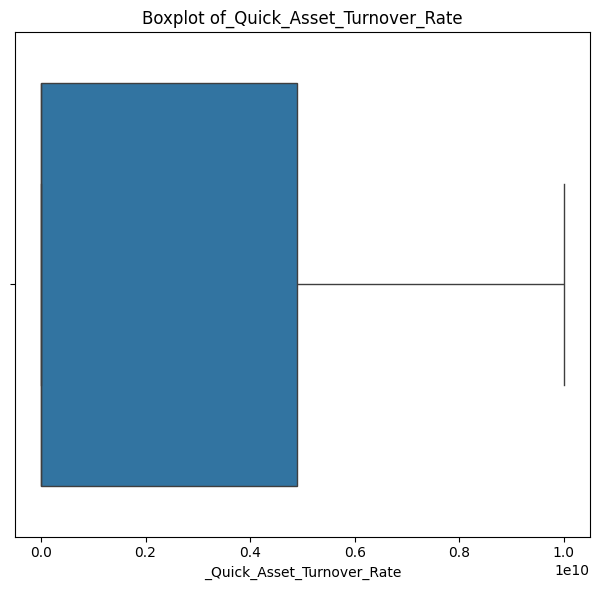

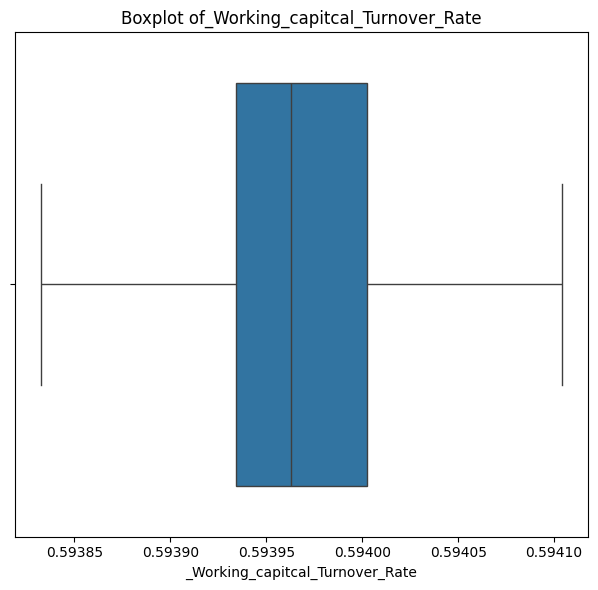

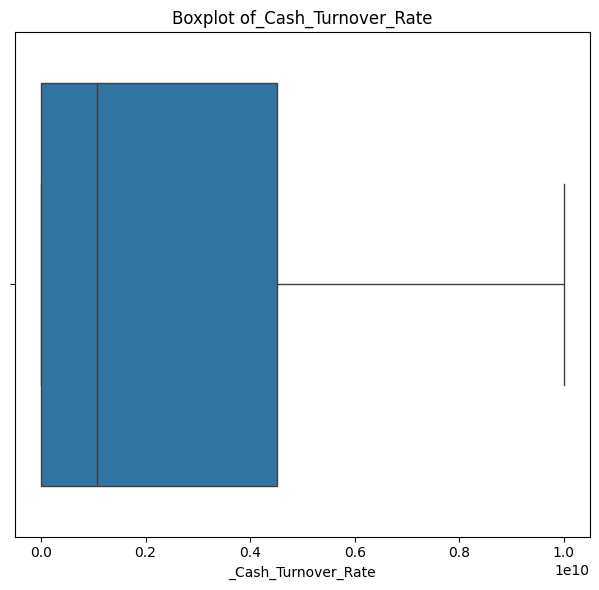

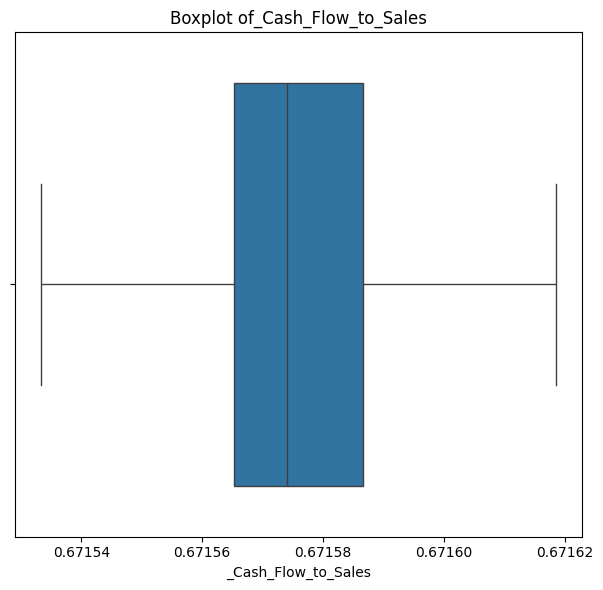

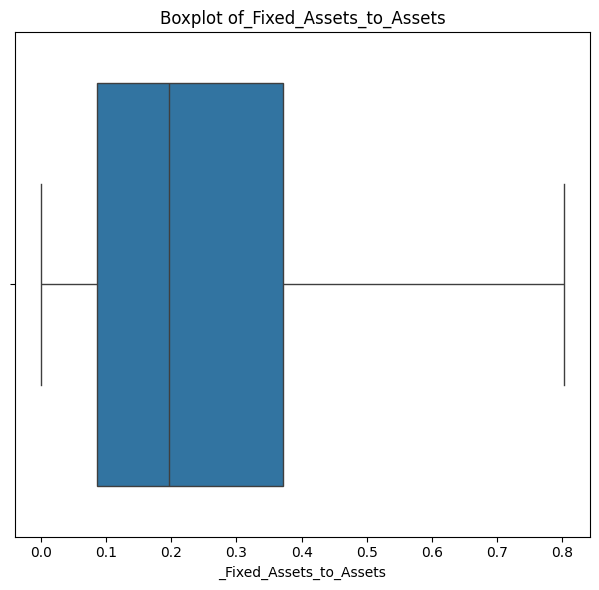

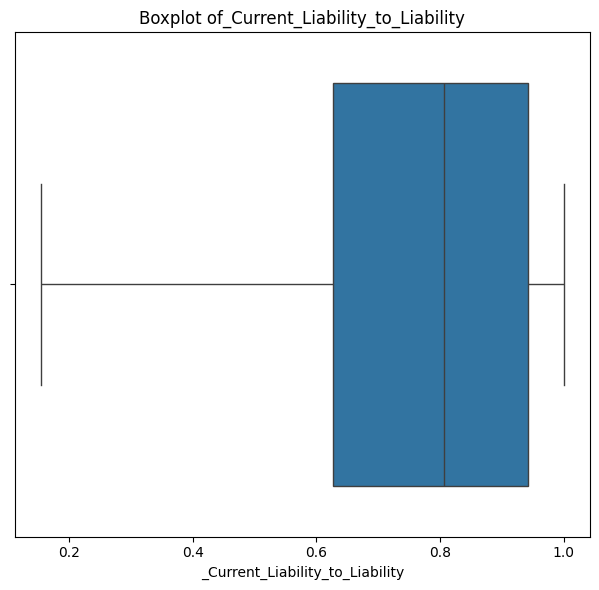

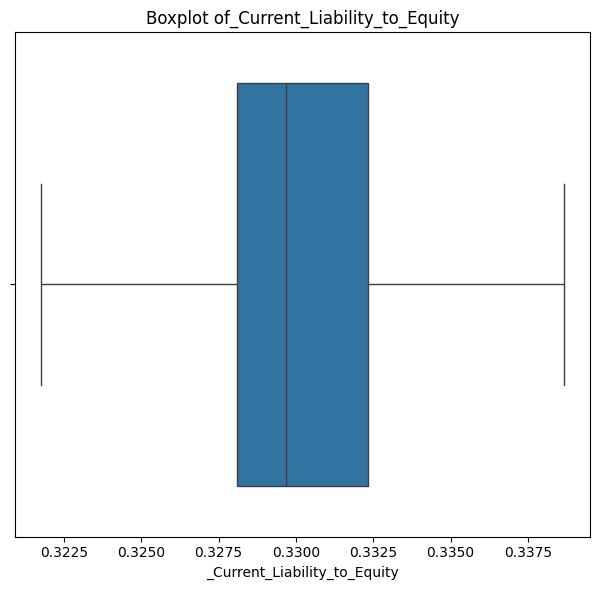

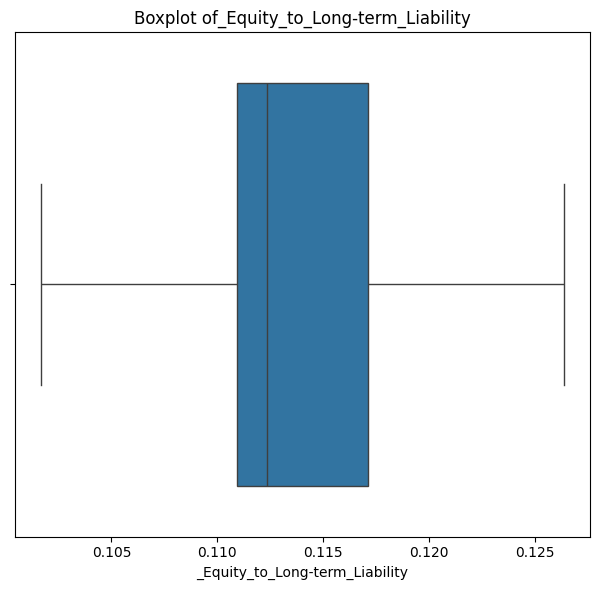

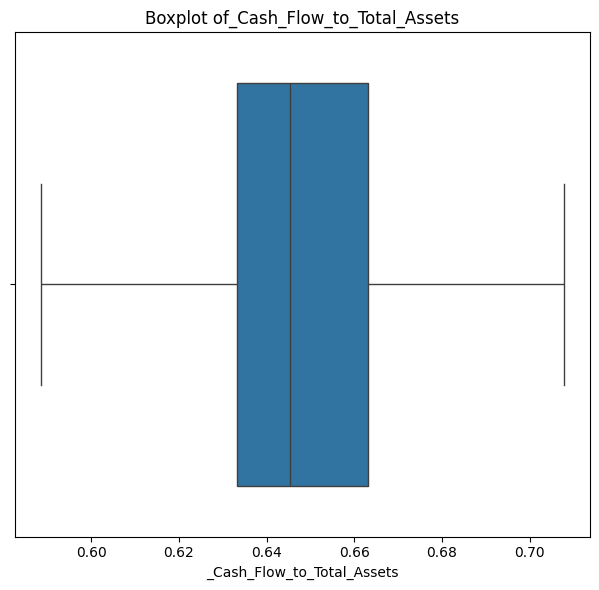

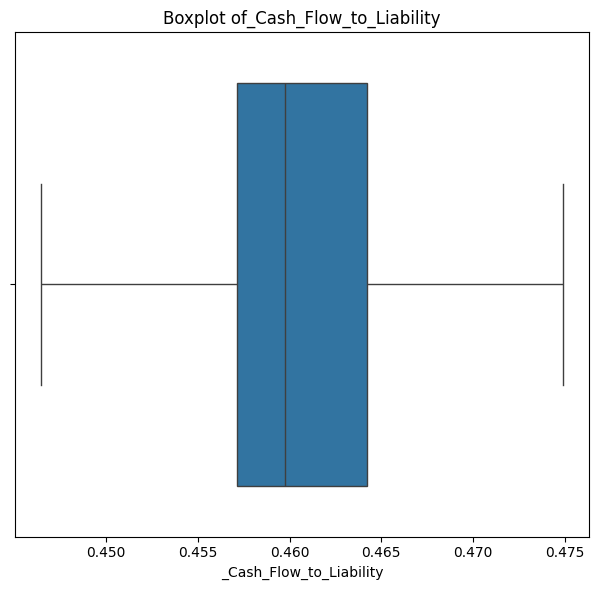

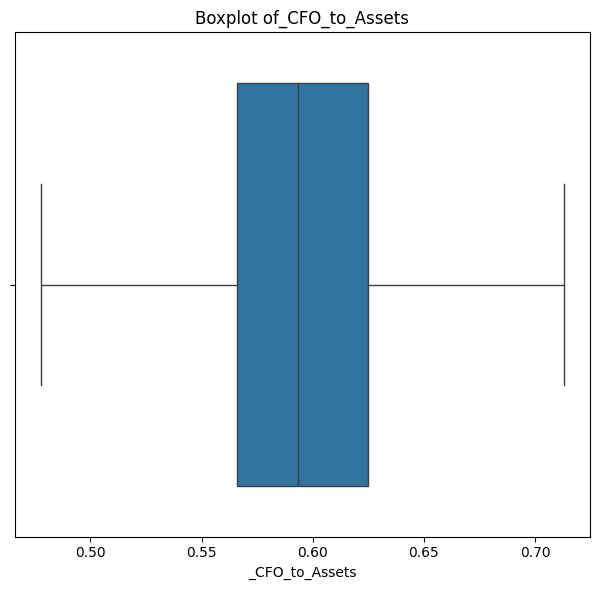

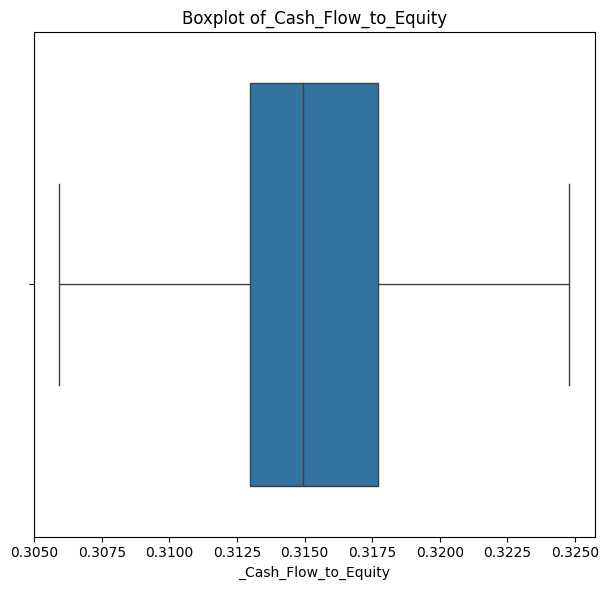

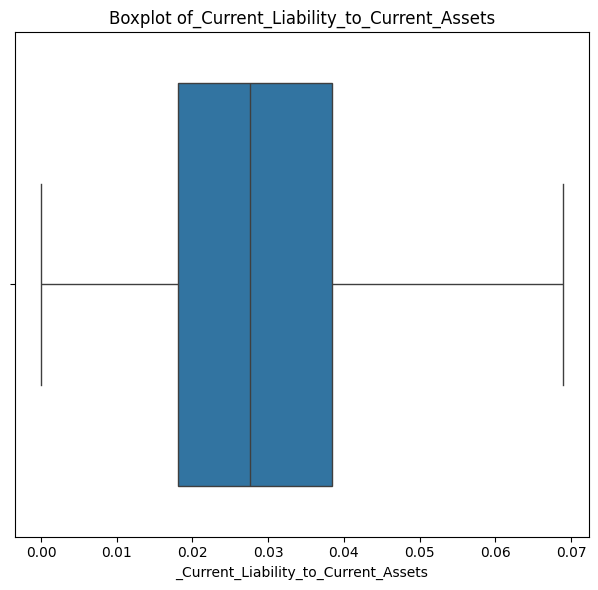

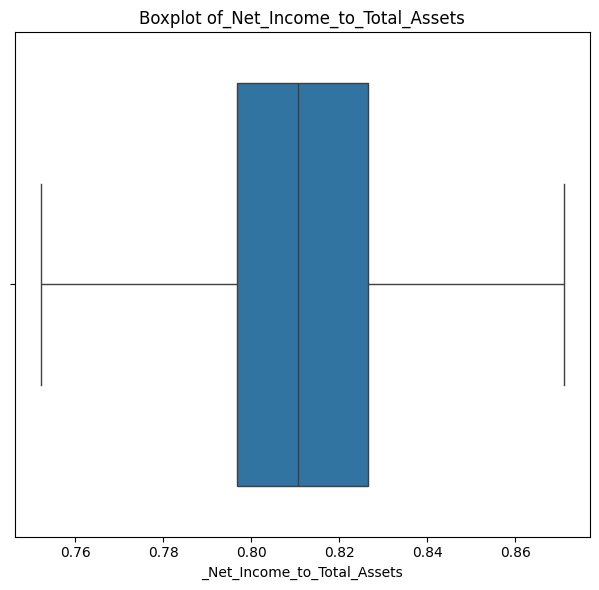

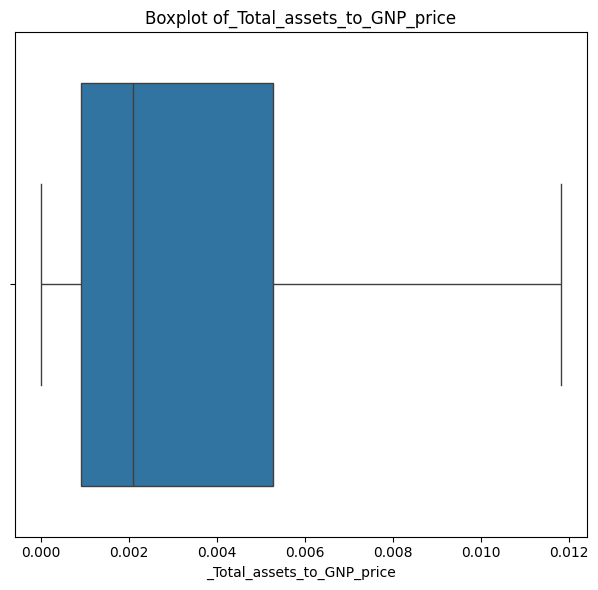

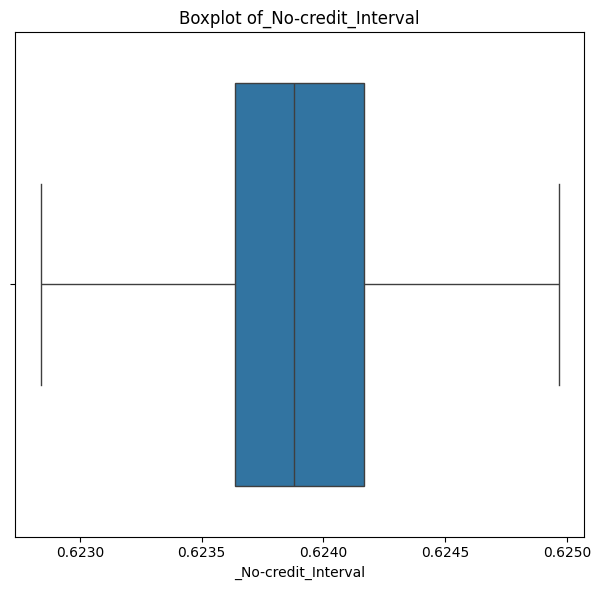

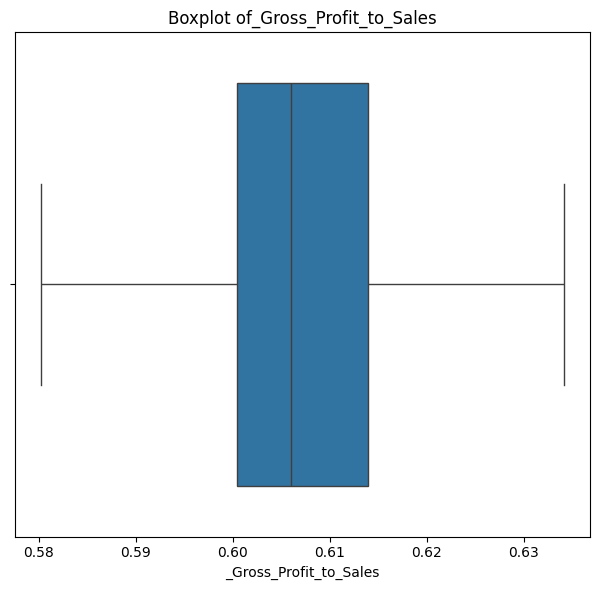

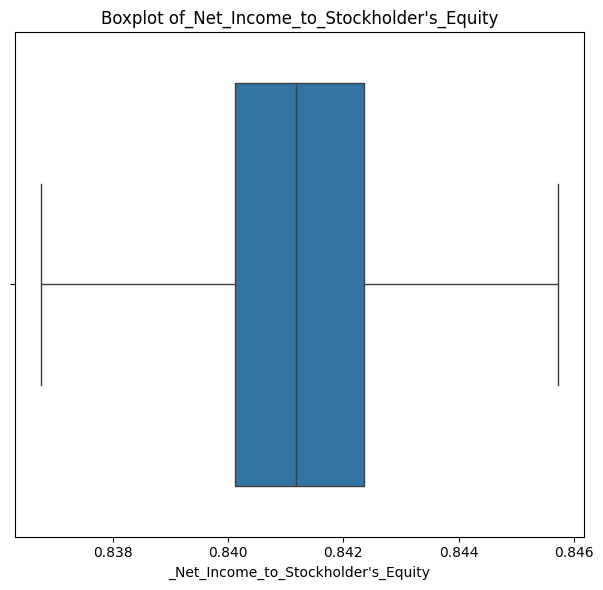

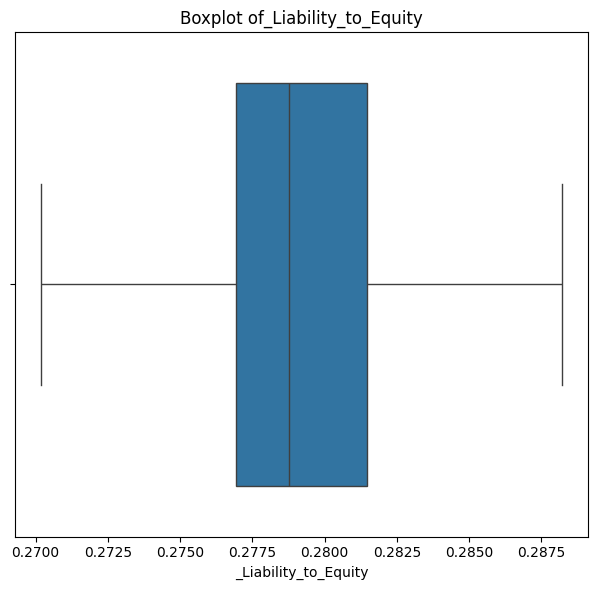

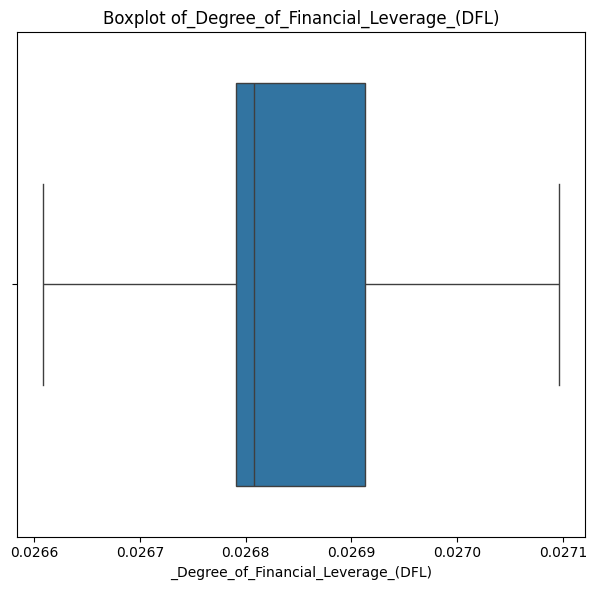

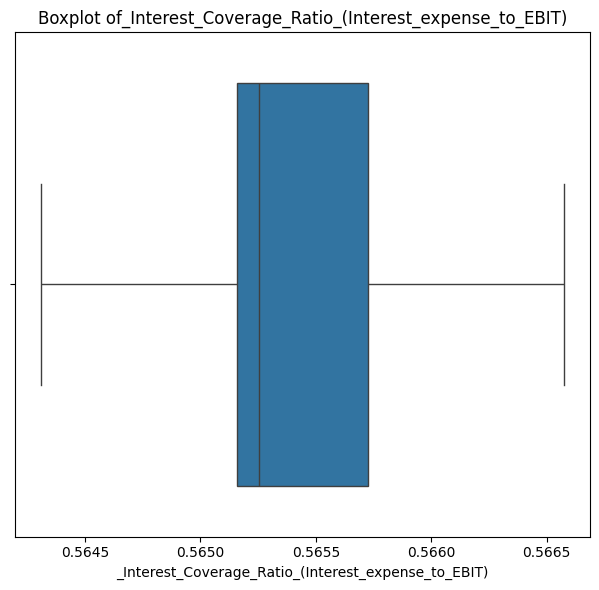

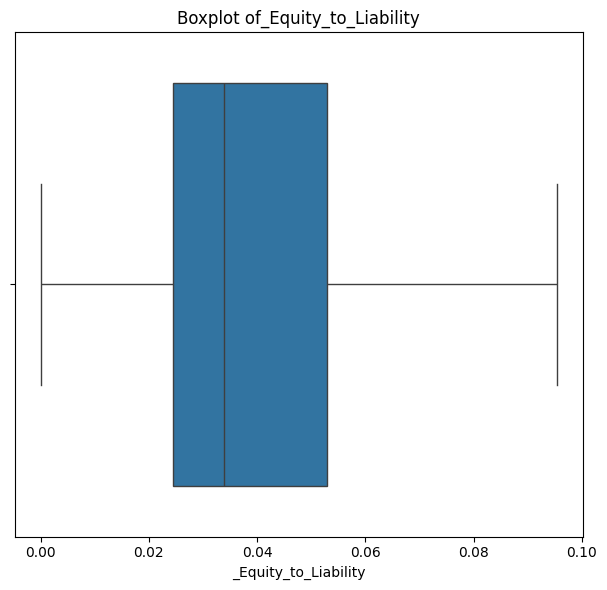

In [73]:
for col in column:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.title(f'Boxplot of{col}')

    plt.tight_layout()
    plt.show()

In [74]:
df1.head()

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Current_Liability_to_Current_Assets,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Equity_to_Liability
0,0.387973,0.455122,0.442034,0.601457,0.601457,0.998969,0.797096,0.809075,0.303288,0.781314,...,0.068886,0.752193,0.009219,0.622879,0.601453,0.836752,0.288207,0.026608,0.564309,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.027096,0.566574,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.797096,0.809075,0.303288,0.781314,...,0.025346,0.774670,0.011819,0.623841,0.601449,0.836774,0.288207,0.026608,0.564309,0.016474
3,0.399844,0.455122,0.457733,0.583541,0.583541,0.998781,0.797096,0.809075,0.303350,0.781314,...,0.067250,0.752193,0.003252,0.622929,0.583538,0.836752,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.026608,0.566574,0.035490


In [79]:
Bank=df[['Bankrupt']]

In [80]:
Liability=df[['_Liability-Assets_Flag']]

In [81]:
Net=df[['_Net_Income_Flag']]

In [82]:
df1['Bankrupt']=Bank

In [83]:
df1['_Liability-Assets_Flag']=Liability

In [84]:
df1['_Net_Income_Flag']=Net

In [85]:
df1.head()

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Equity_to_Liability,Bankrupt,_Liability-Assets_Flag,_Net_Income_Flag
0,0.387973,0.455122,0.442034,0.601457,0.601457,0.998969,0.797096,0.809075,0.303288,0.781314,...,0.622879,0.601453,0.836752,0.288207,0.026608,0.564309,0.016469,1,0,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.623652,0.610237,0.839969,0.283846,0.027096,0.566574,0.020794,1,0,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.797096,0.809075,0.303288,0.781314,...,0.623841,0.601449,0.836774,0.288207,0.026608,0.564309,0.016474,1,0,1
3,0.399844,0.455122,0.457733,0.583541,0.583541,0.998781,0.797096,0.809075,0.303350,0.781314,...,0.622929,0.583538,0.836752,0.281721,0.026697,0.564663,0.023982,1,0,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.623521,0.598782,0.839973,0.278514,0.026608,0.566574,0.035490,1,0,1


## 2. Exploratory Data Analysis (EDA)

In [86]:
print(df1.describe())

       _ROA(C)_before_interest_and_depreciation_before_interest  \
count                                        6819.000000          
mean                                            0.505667          
std                                             0.051483          
min                                             0.387973          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             0.624116          

       _ROA(A)_before_interest_and_%_after_tax  \
count                              6819.000000   
mean                                  0.560507   
std                                   0.050087   
min                                   0.455122   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157

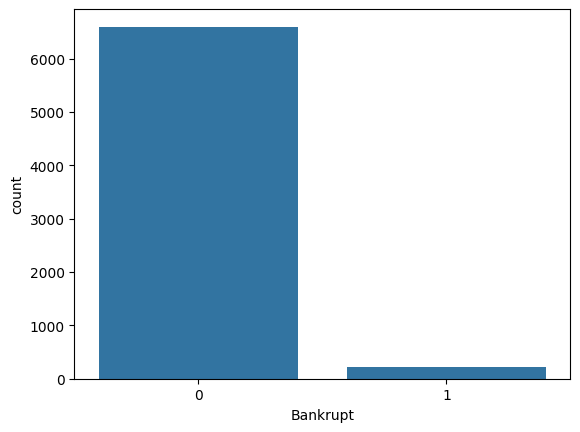

In [87]:
# Visualize the distribution of the target variable
sns.countplot(x='Bankrupt', data=df1)
plt.show()

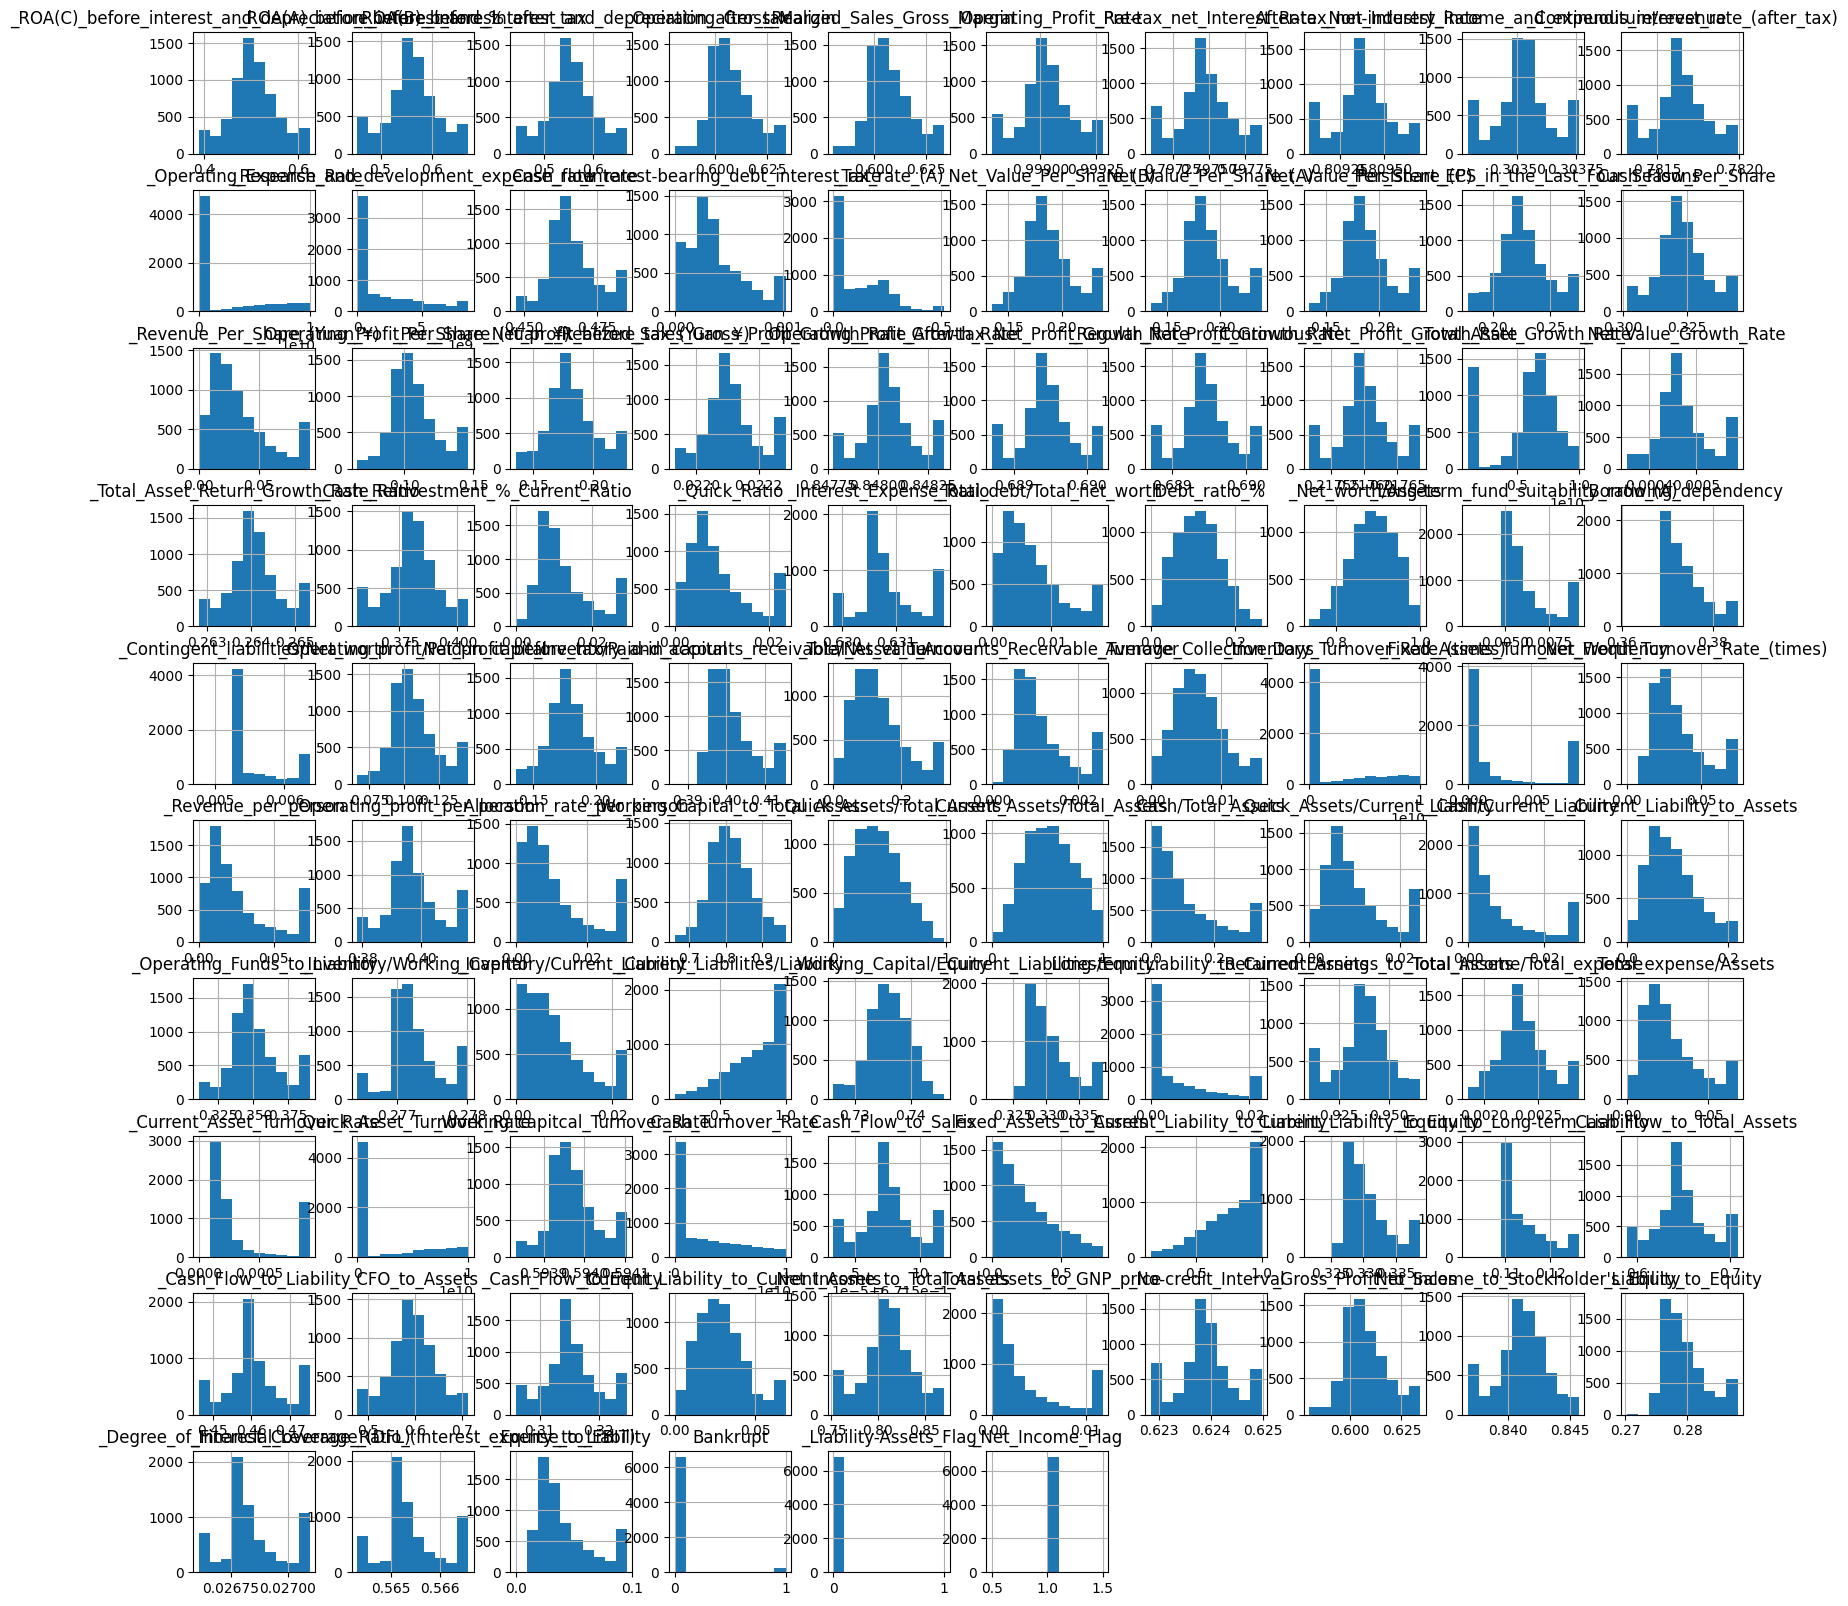

In [88]:
df1.hist(figsize=(20, 20))
plt.show()

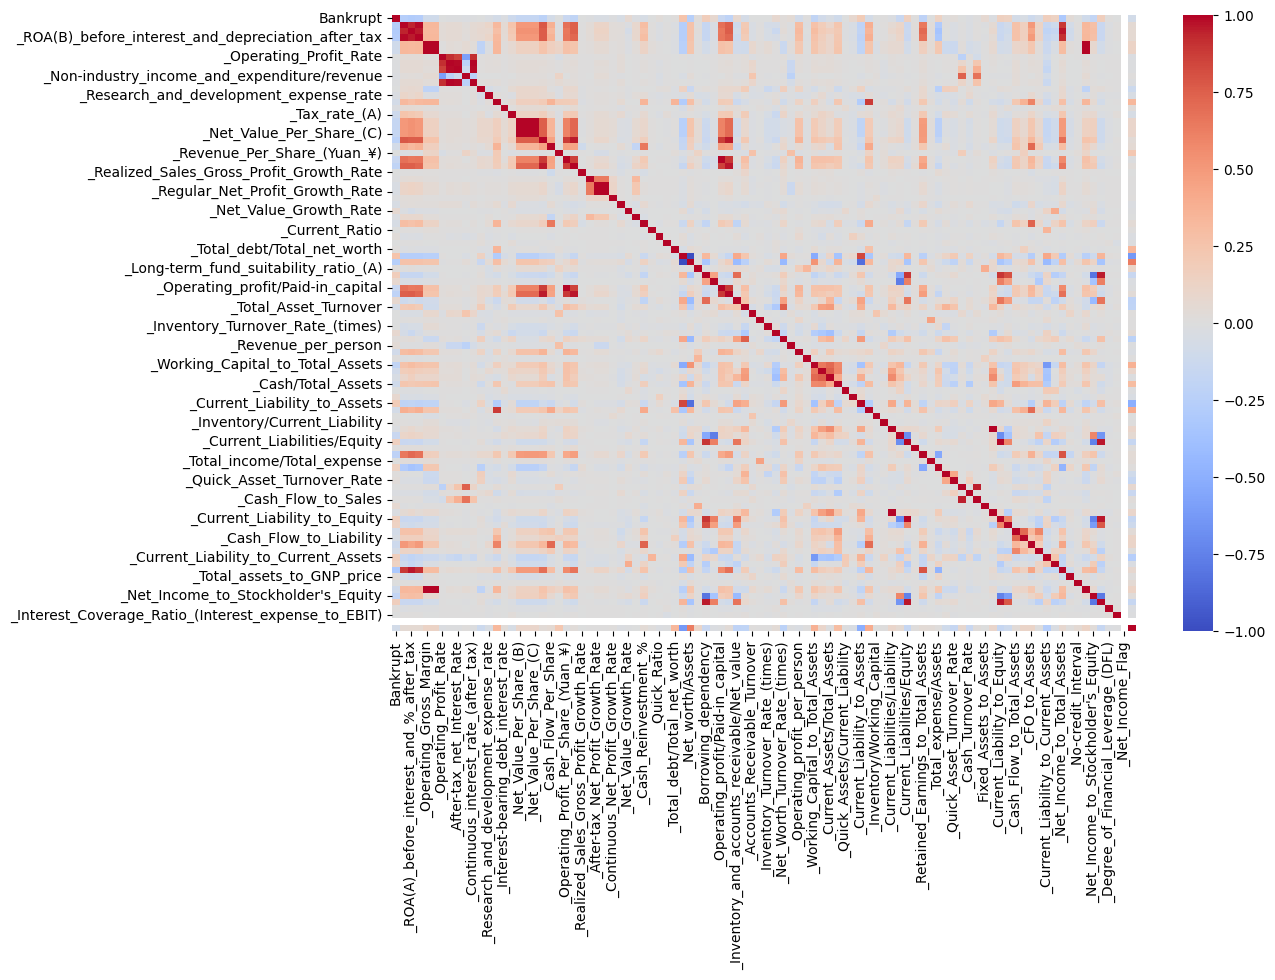

In [89]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()


## 3. Hypothesis Testing

In [90]:
from scipy.stats import ttest_ind

# Hypothesis testing for feature selection
significant_features = []
for column in df1.select_dtypes(include=[np.number]).columns:
    if column != 'Bankrupt':
        bankrupt = df1[df1['Bankrupt'] == 1][column]
        non_bankrupt = df1[df1['Bankrupt'] == 0][column]
        t_stat, p_val = ttest_ind(bankrupt, non_bankrupt)
        if p_val < 0.05:        # if null hypothesis is rejected select that column
            significant_features.append(column)
        print(f'{column}: t-statistic={t_stat}, p-value={p_val}')

print(f'Significant features: {len(significant_features)}')

significant_features.append('Bankrupt')    



_ROA(C)_before_interest_and_depreciation_before_interest: t-statistic=-20.371000246550334, p-value=1.3480464196848803e-89
_ROA(A)_before_interest_and_%_after_tax: t-statistic=-20.36708962978169, p-value=1.453424003163958e-89
_ROA(B)_before_interest_and_depreciation_after_tax: t-statistic=-20.59226229040652, p-value=1.867512034084068e-91
_Operating_Gross_Margin: t-statistic=-11.677652430250529, p-value=3.2823739125123346e-31
_Realized_Sales_Gross_Margin: t-statistic=-11.61220032059553, p-value=6.967922607227421e-31
_Operating_Profit_Rate: t-statistic=-16.315267033012436, p-value=9.863440509107753e-59
_Pre-tax_net_Interest_Rate: t-statistic=-20.235075270990965, p-value=1.8306696788047566e-88
_After-tax_net_Interest_Rate: t-statistic=-20.365632811201365, p-value=1.4947479061257782e-89
_Non-industry_income_and_expenditure/revenue: t-statistic=-18.132844472521544, p-value=8.370733607811912e-72
_Continuous_interest_rate_(after_tax): t-statistic=-21.189549801114605, p-value=1.4678863402201738

C:\Users\Vaishnavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [91]:
# null hypothesis : The mean of the feature is the same for bankrupt and non-bankrupt companies.
# alternate hypothesis : The mean of the feature is different for bankrupt and non-bankrupt companies.
# data is divided into two parts bankrupt and non bankrupt and then applied 2 sample t-test to check significance differance
# if both features mean are different then we can select that features so we can identify diff between bankrupt and non-bankrupt

In [92]:
data = df1[significant_features]

## 4. Feature Engineering and Selection

In [94]:
df1['New_Feature'] = df1['_ROA(C)_before_interest_and_depreciation_before_interest'] / df1['_Operating_Gross_Margin']


In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_features = pca.fit_transform(df1[significant_features])

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(df[significant_features], df1['Bankrupt'])
selected_features = [feature for feature, support in zip(significant_features, fit.support_) if support]
print(f'Selected features: {selected_features}')

C:\Users\Vaishnavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vaishnavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Selected features: ['_Interest-bearing_debt_interest_rate', '_Revenue_Per_Share_(Yuan_¥)', '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate', '_Current_Ratio', '_Average_Collection_Days', '_Revenue_per_person', '_Allocation_rate_per_person', '_Quick_Assets/Current_Liability', '_Fixed_Assets_to_Assets']


## 5. Modeling

In [97]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------------- ------------------------- 92.2/258.3 kB 880.9 kB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(df1[selected_features], df1['Bankrupt'], test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)





In [99]:
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
Step 5.3: Evaluate Model Performance

In [100]:
y_pred = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.8103616813294232
Precision: 0.15246636771300448
Recall: 0.8717948717948718
F1-Score: 0.2595419847328244
ROC-AUC: 0.8398608505315821


In [101]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1590  378]
 [  10   68]]


## 6. Model Interpretation and Insights

In [102]:
coefficients = pd.DataFrame(model.coef_.T, index=selected_features, columns=['Coefficient'])
print(coefficients)

# Sort coefficients to understand feature impact
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients_sorted)

                                      Coefficient
_Interest-bearing_debt_interest_rate     0.609442
_Revenue_Per_Share_(Yuan_¥)             -0.315211
_Total_Asset_Growth_Rate                -0.596525
_Net_Value_Growth_Rate                  -1.160789
_Current_Ratio                          -1.298463
_Average_Collection_Days                 0.603615
_Revenue_per_person                      0.436034
_Allocation_rate_per_person              0.081037
_Quick_Assets/Current_Liability         -0.311700
_Fixed_Assets_to_Assets                  0.028583
                                      Coefficient
_Interest-bearing_debt_interest_rate     0.609442
_Average_Collection_Days                 0.603615
_Revenue_per_person                      0.436034
_Allocation_rate_per_person              0.081037
_Fixed_Assets_to_Assets                  0.028583
_Quick_Assets/Current_Liability         -0.311700
_Revenue_Per_Share_(Yuan_¥)             -0.315211
_Total_Asset_Growth_Rate                -0.596525
